### 1. Establish Mount Point

In [2]:
print('hello')

hello

In [3]:
sourceToBeMounted = "abfss://timeseriesdatalake@wbcstevetstadls1.dfs.core.windows.net/"

In [4]:
spark.conf.set("fs.azure.account.key.wbcstevetstadls1.dfs.core.windows.net", "O6rTsGMEwzat1TKxzOjYurx1mtKv7KqbfYCFVM+ZTtaN5raC9ev6elnEXHgN1QWSj7xK3eKREPtDKJGVghxmnw==") #dbutils.secrets.get(scope = "nyctaxi-adlsgen2-storage", key = "storage-acct-key"))
spark.conf.set("fs.azure.createRemoteFileSystemDuringInitialization", "true")
dbutils.fs.ls("abfss://timeseriesdatalake@wbcstevetstadls1.dfs.core.windows.net/")
spark.conf.set("fs.azure.createRemoteFileSystemDuringInitialization", "false")

### 2. Define credentials for mounting

Client ID <95e67ab5-e043-4ba8-bb07-5704d3e62fdd> and Client Credential <Mq[s:oKpB0T]0HaMvRvH*xXhZsflVw49>. Follow the instructions in Create service principal with portal.
Get directory ID <7ebf3a40-0f86-495e-98d7-20b5bad7d2ac>: This is also referred to as tenant ID. Follow the instructions in Get tenant ID

In [7]:
# Credentials
clientID =  "95e67ab5-e043-4ba8-bb07-5704d3e62fdd" #dbutils.secrets.get(scope = "nyctaxi-adlsgen2-storage", key = "client-id")
clientSecret = "Mq[s:oKpB0T]0HaMvRvH*xXhZsflVw49" # dbutils.secrets.get(scope = "nyctaxi-adlsgen2-storage", key = "client-secret")
tenantID = "https://login.microsoftonline.com/7ebf3a40-0f86-495e-98d7-20b5bad7d2ac/oauth2/token" #+ dbutils.secrets.get(scope = "nyctaxi-adlsgen2-storage", key = "tenant-id") 

# ADLS config for mounting
adlsConfigs = {"fs.azure.account.auth.type": "OAuth",
           "fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
           "fs.azure.account.oauth2.client.id": clientID,
           "fs.azure.account.oauth2.client.secret": clientSecret,
           "fs.azure.account.oauth2.client.endpoint": tenantID}

### 3. Mount ADLSGen2 file systems

#### 3.0.1. Mount a single file system

In [10]:
#One time mounting of data lake file system
#dbutils.fs.mount(
#  source = "abfss://timeseriesdatalake@wbcstevetstadls1.dfs.core.windows.net/",
#  mount_point = "/mnt/course/timeseries/",
#  extra_configs = adlsConfigs)

In [11]:
# Display contents
display(dbutils.fs.ls("/mnt/course/timeseries/"))

path name size dbfs:/mnt/course/timeseries/coursework/ coursework/ 0 dbfs:/mnt/course/timeseries/curated/ curated/ 0 dbfs:/mnt/course/timeseries/exploratory/ exploratory/ 0 dbfs:/mnt/course/timeseries/landing/ landing/ 0 dbfs:/mnt/course/timeseries/staged/ staged/ 0 dbfs:/mnt/course/timeseries/yelp_dataset/ yelp_dataset/ 0

In [12]:
# Display contents
display(dbutils.fs.ls("/mnt/course/timeseries/landing"))

path name size dbfs:/mnt/course/timeseries/landing/epa_co_daily_summary.csv epa_co_daily_summary.csv 2289514800 dbfs:/mnt/course/timeseries/landing/epa_hap_daily_summary.csv epa_hap_daily_summary.csv 2461649186 dbfs:/mnt/course/timeseries/landing/irs2012.csv irs2012.csv 103363969 dbfs:/mnt/course/timeseries/landing/irs2013.csv irs2013.csv 151512834 dbfs:/mnt/course/timeseries/landing/irs2014.csv irs2014.csv 167284073 dbfs:/mnt/course/timeseries/landing/irs2015.csv irs2015.csv 172519509 dbfs:/mnt/course/timeseries/landing/irs2016.csv irs2016.csv 77889781 dbfs:/mnt/course/timeseries/landing/medicare-physician-2012.csv medicare-physician-2012.csv 263436534 dbfs:/mnt/course/timeseries/landing/medicare-physician-2013.csv medicare-physician-2013.csv 272114970 dbfs:/mnt/course/timeseries/landing/medicare-physician-2014.csv medicare-physician-2014.csv 290014656 dbfs:/mnt/course/timeseries/landing/medicare-physician-2015.csv medicare-physician-2015.csv 300302573 dbfs:/mnt/course/timeseries/landing/medicare-physician-2016.csv medicare-physician-2016.csv 327526352 dbfs:/mnt/course/timeseries/landing/uszips.csv uszips.csv 5172160

In [13]:
# Unmount in case its already
#dbutils.fs.unmount("/mnt/course/timeseries")

In [14]:
df_uszips = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/uszips.csv')
display(df_uszips)

zip lat lng city state_id state_name zcta parent_zcta population density county_fips county_name all_county_weights imprecise military timezone 601 18.18 -66.7522 Adjuntas PR Puerto Rico true null 18570 111.4 72001 Adjuntas {'72001':99.43,'72141':0.57} false false America/Puerto_Rico 602 18.3607 -67.1752 Aguada PR Puerto Rico true null 41520 523.7 72003 Aguada {'72003':100} false false America/Puerto_Rico 603 18.4544 -67.122 Aguadilla PR Puerto Rico true null 54689 667.9 72005 Aguadilla {'72005':100} false false America/Puerto_Rico 606 18.1672 -66.9383 Maricao PR Puerto Rico true null 6615 60.4 72093 Maricao {'72093':94.88,'72121':1.35,'72153':3.78} false false America/Puerto_Rico 610 18.2903 -67.1224 Anasco PR Puerto Rico true null 29016 311.9 72011 Añasco {'72003':0.55,'72011':99.45} false false America/Puerto_Rico 612 18.407 -66.708 Arecibo PR Puerto Rico true null 67010 382.7 72013 Arecibo {'72013':99.89,'72017':0.11} false false America/Puerto_Rico 616 18.4175 -66.6681 Bajadero PR Puerto Rico true null 11017 368.9 72013 Arecibo {'72013':100} false false America/Puerto_Rico 617 18.4412 -66.5592 Barceloneta PR Puerto Rico true null 24597 625.1 72017 Barceloneta {'72017':99.43,'72054':0.57} false false America/Puerto_Rico 622 17.9917 -67.1525 Boqueron PR Puerto Rico true null 7853 104.6 72023 Cabo Rojo {'72023':100} false false America/Puerto_Rico 623 18.0835 -67.1542 Cabo Rojo PR Puerto Rico true null 43061 437.8 72023 Cabo Rojo {'72023':100} false false America/Puerto_Rico 624 18.0646 -66.7182 Penuelas PR Puerto Rico true null 26241 234.7 72111 Peñuelas {'72111':92.53,'72113':7.47} false false America/Puerto_Rico 627 18.419 -66.8603 Camuy PR Puerto Rico true null 35159 292.8 72027 Camuy {'72027':100} false false America/Puerto_Rico 631 18.1856 -66.8333 Castaner PR Puerto Rico true null 1852 177.8 72081 Lares {'72001':32.99,'72081':67.01} false false America/Puerto_Rico 637 18.0798 -66.9427 Sabana Grande PR Puerto Rico true null 25287 283.4 72121 Sabana Grande {'72121':99.56,'72153':0.44} false false America/Puerto_Rico 638 18.289 -66.5151 Ciales PR Puerto Rico true null 18941 110.7 72039 Ciales {'72039':98.27,'72091':1.73} false false America/Puerto_Rico 641 18.2641 -66.7138 Utuado PR Puerto Rico true null 31191 128.8 72141 Utuado {'72001':0.21,'72141':99.79} false false America/Puerto_Rico 646 18.434 -66.2833 Dorado PR Puerto Rico true null 38199 712.5 72051 Dorado {'72051':99.89,'72143':0.11} false false America/Puerto_Rico 647 17.9661 -66.9438 Ensenada PR Puerto Rico true null 6172 156.7 72055 Guánica {'72055':98.88,'72079':1.12} false false America/Puerto_Rico 650 18.3432 -66.586 Florida PR Puerto Rico true null 14998 189.7 72054 Florida {'72013':1.51,'72017':1.91,'72039':1.13,'72054':83.61,'72141':11.84} false false America/Puerto_Rico 652 18.4554 -66.6063 Garrochales PR Puerto Rico true null 4715 263.2 72013 Arecibo {'72013':100} false false America/Puerto_Rico 653 17.9857 -66.8903 Guanica PR Puerto Rico true null 13307 337.1 72055 Guánica {'72055':100} false false America/Puerto_Rico 656 18.0528 -66.7918 Guayanilla PR Puerto Rico true null 21481 255.9 72059 Guayanilla {'72059':100} false false America/Puerto_Rico 659 18.4107 -66.7965 Hatillo PR Puerto Rico true null 41953 387.7 72065 Hatillo {'72065':100} false false America/Puerto_Rico 660 18.1342 -67.114 Hormigueros PR Puerto Rico true null 17250 587.4 72067 Hormigueros {'72067':100} false false America/Puerto_Rico 662 18.4621 -67.0144 Isabela PR Puerto Rico true null 43282 376.7 72071 Isabela {'72071':100} false false America/Puerto_Rico 664 18.2115 -66.5889 Jayuya PR Puerto Rico true null 16784 142.4 72073 Jayuya {'72073':99.15,'72141':0.85} false false America/Puerto_Rico 667 18.0123 -67.0409 Lajas PR Puerto Rico true null 25968 166.2 72079 Lajas {'72079':98.91,'72125':1.09} false false America/Puerto_Rico 669 18.271 -66.8698 Lares PR Puerto Rico true null 29744 186.6 72081 Lares {'72081':99.22,'72083':0.62,'72131':0.16} false false America/Puerto_Rico 670 18.2

In [15]:
from pyspark.sql.functions import substring, concat, col
df_uszips = df_uszips.withColumn('fips_lastthree', substring(df_uszips['county_fips'], -3, 3))
df_uszips = df_uszips.withColumn('state_countycode', concat(col("fips_lastthree"), col("state_name")))
df_uszips = df_uszips.select(['state_countycode', 'zip'])
display(df_uszips)

state_countycode zip 001Puerto Rico 601 003Puerto Rico 602 005Puerto Rico 603 093Puerto Rico 606 011Puerto Rico 610 013Puerto Rico 612 013Puerto Rico 616 017Puerto Rico 617 023Puerto Rico 622 023Puerto Rico 623 111Puerto Rico 624 027Puerto Rico 627 081Puerto Rico 631 121Puerto Rico 637 039Puerto Rico 638 141Puerto Rico 641 051Puerto Rico 646 055Puerto Rico 647 054Puerto Rico 650 013Puerto Rico 652 055Puerto Rico 653 059Puerto Rico 656 065Puerto Rico 659 067Puerto Rico 660 071Puerto Rico 662 073Puerto Rico 664 079Puerto Rico 667 081Puerto Rico 669 083Puerto Rico 670 091Puerto Rico 674 099Puerto Rico 676 117Puerto Rico 677 115Puerto Rico 678 097Puerto Rico 680 097Puerto Rico 682 125Puerto Rico 683 131Puerto Rico 685 101Puerto Rico 687 013Puerto Rico 688 005Puerto Rico 690 143Puerto Rico 692 145Puerto Rico 693 145Puerto Rico 694 153Puerto Rico 698 007Puerto Rico 703 123Puerto Rico 704 009Puerto Rico 705 095Puerto Rico 707 015Puerto Rico 714 113Puerto Rico 715 113Puerto Rico 716 113Puerto Rico 717 103Puerto Rico 718 105Puerto Rico 719 107Puerto Rico 720 109Puerto Rico 723 025Puerto Rico 725 025Puerto Rico 727 113Puerto Rico 728 029Puerto Rico 729 113Puerto Rico 730 113Puerto Rico 731 037Puerto Rico 735 035Puerto Rico 736 053Puerto Rico 738 041Puerto Rico 739 053Puerto Rico 740 069Puerto Rico 741 119Puerto Rico 745 123Puerto Rico 751 129Puerto Rico 754 133Puerto Rico 757 147Puerto Rico 765 149Puerto Rico 766 151Puerto Rico 767 043Puerto Rico 769 085Puerto Rico 771 087Puerto Rico 772 089Puerto Rico 773 049Puerto Rico 775 077Puerto Rico 777 063Puerto Rico 778 113Puerto Rico 780 045Puerto Rico 782 047Puerto Rico 783 057Puerto Rico 784 009Puerto Rico 786 069Puerto Rico 791 019Puerto Rico 794 075Puerto Rico 795 127Puerto Rico 901 127Puerto Rico 906 127Puerto Rico 907 127Puerto Rico 909 127Puerto Rico 911 127Puerto Rico 912 127Puerto Rico 913 127Puerto Rico 915 127Puerto Rico 917 127Puerto Rico 918 127Puerto Rico 920 127Puerto Rico 921 127Puerto Rico 923 127Puerto Rico 924 127Puerto Rico 925 127Puerto Rico 926 127Puerto Rico 927 061Puerto Rico 934 127Puerto Rico 936 137Puerto Rico 949 051Puerto Rico 950 137Puerto Rico 951 137Puerto Rico 952 135Puerto Rico 953 021Puerto Rico 956 021Puerto Rico 957 021Puerto Rico 959 021Puerto Rico 960 021Puerto Rico 961 033Puerto Rico 962 061Puerto Rico 965 061Puerto Rico 966 061Puerto Rico 968 061Puerto Rico 969 061Puerto Rico 971 139Puerto Rico 976 031Puerto Rico 979 031Puerto Rico 982 031Puerto Rico 983 031Puerto Rico 985 031Puerto Rico 987 013Massachusetts 1001 015Massachusetts 1002 015Massachusetts 1003 027Massachusetts 1005 015Massachusetts 1007 013Massachusetts 1008 013Massachusetts 1009 013Massachusetts 1010 013Massachusetts 1011 015Massachusetts 1012 013Massachusetts 1013 013Massachusetts 1020 013Massachusetts 1022 015Massachusetts 1026 015Massachusetts 1027 013Massachusetts 1028 003Massachusetts 1029 013Massachusetts 1030 027Massachusetts 1031 015Massachusetts 1032 015Massachusetts 1033 013Massachusetts 1034 015Massachusetts 1035 013Massachusetts 1036 027Massachusetts 1037 015Massachusetts 1038 015Massachusetts 1039 013Massachusetts 1040 015Massachusetts 1050 015Massachusetts 1053 011Massachusetts 1054 013Massachusetts 1056 013Massachusetts 1057 015Massachusetts 1060 015Massachusetts 1062 015Massachusetts 1063 015Massachusetts 1066 027Massachusetts 1068 013Massachusetts 1069 015Massachusetts 1070 013Massachusetts 1071 011Massachusetts 1072 015Massachusetts 1073 027Massachusetts 1074 015Massachusetts 1075 013Massachusetts 1077 013Massachusetts 1079 013Massachusetts 1080 013Massachusetts 1081 015Massachusetts 1082 027Massachusetts 1083 015Massachusetts 1084 013Massachusetts 1085 013Massachusetts 1086 015Massachusetts 1088 013Massachusetts 1089 027Massachusetts 1092 011Massachusetts 1093 027Massachusetts 1094 013Massachusetts 1095 015Massachusetts 1096 013Massachusetts 1097 015Massachusetts 1098 013Massachusetts 1103 013Massachusetts 1104 013Massachusetts 1105 013Massachusetts 1106 013Massachusetts

In [16]:
df_epa_hap = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/epa_hap_daily_summary.csv')
df_epa_co = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/epa_co_daily_summary.csv')

In [17]:
df_epa_hap_grp = df_epa_hap.groupby("parameter_name").count().sort("count").orderBy(["count"], ascending=[0])
df_epa_hap_grp.show(100)

+--------------------+------+
 parameter_name| count|
+--------------------+------+
 Lead PM2.5 LC|600171|
 Nickel PM2.5 LC|600150|
 Manganese PM2.5 LC|599855|
 Chromium PM2.5 LC|598372|
 Arsenic PM2.5 LC|598221|
 Benzene|469375|
 13-Butadiene|308983|
 Tetrachloroethylene|245750|
 Chloroform|245517|
 Dichloromethane|244835|
Carbon tetrachloride|241771|
 Trichloroethylene|237081|
 Cadmium PM2.5 LC|236056|
 Ethylene dichloride|224342|
 Vinyl chloride|222726|
 12-Dichloropropane|198818|
 Ethylene dibromide|195493|
trans-13-Dichloro...|186210|
cis-13-Dichloropr...|182596|
1122-Tetrachloroe...|179699|
 Formaldehyde|172991|
 Acetaldehyde|169218|
 Cadmium (TSP) STP|124696|
 Chromium (TSP) STP|119733|
 Nickel (TSP) STP|119639|
 Manganese (TSP) STP|115290|
 Arsenic (TSP) STP|112697|
Acrolein - Unveri...| 91268|
 Beryllium (TSP) STP| 79258|
 Lead PM10 STP| 57289|
 Arsenic PM10 STP| 49664|
 Manganese PM10 STP| 47263|
 Nickel PM10 STP| 46572|
 Chromium PM10 STP| 45137|
 Cadmium PM10 STP| 41661|
 Beryllium PM10 STP| 36268|
Chromium VI (TSP)...| 23277|
 Acrolein - Verified| 14086|
 Mercury PM10 STP| 12528|
 Beryllium PM2.5 LC| 1565|
Chromium VI (TSP) LC| 948|
+--------------------+------+

In [18]:
display(df_epa_co)

state_code county_code site_num parameter_code poc latitude longitude datum parameter_name sample_duration pollutant_standard date_local units_of_measure event_type observation_count observation_percent arithmetic_mean first_max_value first_max_hour aqi method_code method_name local_site_name address state_name county_name city_name cbsa_name date_of_last_change 6 73 5 42101 1 33.20265 -117.365925 NAD27 Carbon monoxide 1 HOUR CO 1-hour 1971 1994-02-01T00:00:00.000+0000 Parts per million None 24 100.0 1.129167 1.9 8 null 66 INSTRUMENTAL - NONDISPERSIVE INFRARED Oceanside-Mission Ave 1701 MISSION AVE. OCEANSIDE California San Diego Oceanside San Diego-Carlsbad CA 2016-04-27T00:00:00.000+0000 39 113 28 42101 1 39.787222 -84.226111 NAD83 Carbon monoxide 1 HOUR CO 1-hour 1971 1996-04-29T00:00:00.000+0000 Parts per million None 24 100.0 0.533333 1.2 17 null 67 INSTRUMENTAL - NONDISPERSIVE INFRARED FROC 901 WEST FAIRVIEW AVE. Ohio Montgomery Dayton Dayton OH 2016-04-26T00:00:00.000+0000 30 31 16 42101 1 44.661393 -111.105891 WGS84 Carbon monoxide 1 HOUR CO 1-hour 1971 2010-05-06T00:00:00.000+0000 Parts per million None 23 96.0 0.156522 0.3 22 null 93 INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER West Yellowstone City Center ALLEY Montana Gallatin West Yellowstone Bozeman MT 2016-04-10T00:00:00.000+0000 51 13 20 42101 1 38.8577 -77.05922 WGS84 Carbon monoxide 1 HOUR CO 1-hour 1971 2005-05-05T00:00:00.000+0000 Parts per million None 24 100.0 0.2875 0.8 5 null 67 INSTRUMENTAL - NONDISPERSIVE INFRARED Aurora Hills Visitors Center S 18TH AND HAYES ST Virginia Arlington Arlington Washington-Arlington-Alexandria DC-VA-MD-WV 2016-04-21T00:00:00.000+0000 6 65 8001 42101 1 33.99958 -117.41601 WGS84 Carbon monoxide 1 HOUR CO 1-hour 1971 2005-06-19T00:00:00.000+0000 Parts per million None 23 96.0 0.321739 0.6 5 null 67 INSTRUMENTAL - NONDISPERSIVE INFRARED Rubidoux 5888 MISSION BLVD. RUBIDOUX California Riverside Rubidoux Riverside-San Bernardino-Ontario CA 2016-04-21T00:00:00.000+0000 32 31 1005 42101 1 39.540917 -119.746761 WGS84 Carbon monoxide 1 HOUR CO 1-hour 1971 2012-09-29T00:00:00.000+0000 Parts per million None 24 100.0 0.383333 0.8 6 null 93 INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER Sparks 750 4TH ST SPARKS NV 89431 Nevada Washoe Sparks Reno NV 2016-04-09T00:00:00.000+0000 34 39 3 42101 1 40.662389 -74.214817 WGS84 Carbon monoxide 8-HR RUN AVG END HOUR CO 8-hour 1971 2016-06-06T00:00:00.000+0000 Parts per million None 24 100.0 0.375 0.4 0 5 null - Elizabeth 7 Broad Street New Jersey Union Elizabeth New York-Newark-Jersey City NY-NJ-PA 2017-03-17T00:00:00.000+0000 23 3 1100 42101 1 46.696431 -68.033006 NAD83 Carbon monoxide 8-HR RUN AVG END HOUR CO 8-hour 1971 2010-09-03T00:00:00.000+0000 Parts per million None 24 100.0 0.1875 0.2 0 2 null - MICMAC HEALTH DEPARTMENT 8 NORTHERN ROAD PRESQUE ISLE ME 04769 Maine Aroostook Presque Isle null 2011-02-01T00:00:00.000+0000 48 439 3011 42101 1 32.656357 -97.088585 NAD83 Carbon monoxide 8-HR RUN AVG END HOUR CO 8-hour 1971 2009-07-16T00:00:00.000+0000 Parts per million None 24 100.0 0.2 0.2 0 2 null - Arlington Municipal Airport 5504 South Collins Street Texas Tarrant Arlington Dallas-Fort Worth-Arlington TX 2016-04-11T00:00:00.000+0000 9 3 17 42101 1 41.769167 -72.670278 WGS84 Carbon monoxide 8-HR RUN AVG END HOUR CO 8-hour 1971 2008-07-20T00:00:00.000+0000 Parts per million None 24 100.0 1.008333 1.3 0 15 null - null COURTHOUSE 155 MORGAN STREET Connecticut Hartford Hartford Hartford-West Hartford-East Hartford CT 2016-04-11T00:00:00.000+0000 30 111 82 42101 1 45.783889 -108.515 NAD27 Carbon monoxide 1 HOUR CO 1-hour 1971 1999-09-16T00:00:00.000+0000 Parts per million None 24 100.0 1.2875 3.2 20 null 93 INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER BLGS BRIDAL SHOP LOW POINT IN TOPOGRAPHY OF URBAN BILLINGS BLGS BRIDAL SHOP 8 GRAND AVE Montana Yellowstone Billings Billings MT 2016-04-19T00:00:00.000+0000 36 5 133 42101 1 40.8679 -73.87809 WGS84 Carbon monoxide 8-HR RUN AVG END HO

In [19]:
df_epa_co_grp = df_epa_co.groupby("sample_duration").count().sort("count").orderBy(["count"], ascending=[0])
df_epa_co_grp.show(100)

+--------------------+-------+
 sample_duration| count|
+--------------------+-------+
8-HR RUN AVG END ...|4033344|
 1 HOUR|4031476|
+--------------------+-------+

In [20]:
df_epa_co.columns

Out[ 614 ]: 
['state_code',
 'county_code',
 'site_num',
 'parameter_code',
 'poc',
 'latitude',
 'longitude',
 'datum',
 'parameter_name',
 'sample_duration',
 'pollutant_standard',
 'date_local',
 'units_of_measure',
 'event_type',
 'observation_count',
 'observation_percent',
 'arithmetic_mean',
 'first_max_value',
 'first_max_hour',
 'aqi',
 'method_code',
 'method_name',
 'local_site_name',
 'address',
 'state_name',
 'county_name',
 'city_name',
 'cbsa_name',
 'date_of_last_change']

In [21]:
df_epa_co = df_epa_co.withColumn('Year', df_epa_co['date_local'].substr(0,4))

In [22]:
from pyspark.sql import functions as F

In [23]:
from pyspark.sql.functions import concat, col, lit
df_epa_co_grp = df_epa_co.groupBy('county_code', 'state_name', 'Year', 'parameter_name').agg(F.avg('arithmetic_mean')).orderBy(["county_code"], ascending=[0])

df_epa_co_grp_2012 = df_epa_co_grp.filter("Year ='2012'")
df_epa_co_grp_2012 = df_epa_co_grp_2012.withColumn('state_countycode', concat(col("county_code"), col("state_name")))

df_epa_co_grp_2013 = df_epa_co_grp.filter("Year ='2013'")
df_epa_co_grp_2013 = df_epa_co_grp_2013.withColumn('state_countycode', concat(col("county_code"), col("state_name")))

df_epa_co_grp_2014 = df_epa_co_grp.filter("Year ='2014'")
df_epa_co_grp_2014 = df_epa_co_grp_2014.withColumn('state_countycode', concat(col("county_code"), col("state_name")))

df_epa_co_grp_2015 = df_epa_co_grp.filter("Year ='2015'")
df_epa_co_grp_2015 = df_epa_co_grp_2015.withColumn('state_countycode', concat(col("county_code"), col("state_name")))

df_epa_co_grp_2016 = df_epa_co_grp.filter("Year ='2016'")
df_epa_co_grp_2016 = df_epa_co_grp_2016.withColumn('state_countycode', concat(col("county_code"), col("state_name")))


In [24]:
df_epa_co_grp_2012 = df_epa_co_grp_2012.join(df_uszips, df_epa_co_grp_2012.state_countycode == df_uszips.state_countycode)
df_epa_co_grp_2013 = df_epa_co_grp_2013.join(df_uszips, df_epa_co_grp_2013.state_countycode == df_uszips.state_countycode)
df_epa_co_grp_2014 = df_epa_co_grp_2014.join(df_uszips, df_epa_co_grp_2014.state_countycode == df_uszips.state_countycode)
df_epa_co_grp_2015 = df_epa_co_grp_2015.join(df_uszips, df_epa_co_grp_2015.state_countycode == df_uszips.state_countycode)
df_epa_co_grp_2016 = df_epa_co_grp_2016.join(df_uszips, df_epa_co_grp_2016.state_countycode == df_uszips.state_countycode)

In [25]:
df_epa_co_grp_2012 = df_epa_co_grp_2012.select(['zip', 'avg(arithmetic_mean)'])
df_epa_co_grp_2013 = df_epa_co_grp_2013.select(['zip', 'avg(arithmetic_mean)'])
df_epa_co_grp_2014 = df_epa_co_grp_2014.select(['zip', 'avg(arithmetic_mean)'])
df_epa_co_grp_2015 = df_epa_co_grp_2015.select(['zip', 'avg(arithmetic_mean)'])
df_epa_co_grp_2016 = df_epa_co_grp_2016.select(['zip', 'avg(arithmetic_mean)'])

In [26]:
df_epa_co_grp_2012.count()

Out[ 620 ]: 1581

In [27]:
df_physician2012 = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/medicare-physician-2012.csv')
df_physician2013 = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/medicare-physician-2013.csv')
df_physician2014 = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/medicare-physician-2014.csv')
df_physician2015 = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/medicare-physician-2015.csv')
df_physician2016 = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/medicare-physician-2016.csv')

In [28]:
len(df_physician2016.columns)

Out[ 622 ]: 70

In [29]:
# drop extra columns that do not exist in 2012 and 2013 data
columns_to_drop = ['Total Medicare Standardized Payment Amount', 'Total Drug Medicare Standardized Payment Amount', 'Total Medical Medicare Standardized Payment Amount']
df_physician2014 = df_physician2014.drop(*columns_to_drop)
df_physician2015 = df_physician2015.drop(*columns_to_drop)
df_physician2016 = df_physician2016.drop(*columns_to_drop)

In [30]:
# new column names for consistency across all years
newColumns = ['NPI',
'LastName',
'FirstName',
'MiddleInitial',
'Credentials',
'Gender',
'EntityCode',
'Address1',
'Address2',
'City',
'Zip',
'State',
'Country',
'ProviderType',
'MPI',
'HCPCSCount',
'ServicesCount',
'UniqueBeneficiariesCount',
'TotalSubmittedCharges',
'TotalAllowedAmount',
'TotalPaymentAmount',
'DSI',
'HCPCSDrugCount',
'DrugServicesCount',
'UniqueBeneficiariesDrugCount',
'DrugSubmittedCharges',
'DrugAllowedAmount',
'DrugPaymentAmount',
'MSI',
'HCPCSMedicalCount',
'MedicalServicesCount',
'UniqueBeneficiariesMedicalCount',
'MedicalSubmittedCharges',
'MedicalAllowedAmount',
'MedicalPaymentAmount',
'AverageBeneficiaryAge',
'BeneficiaryCountLessThan65',
'BeneficiaryCount65To74',
'BeneficiaryCount75To84',
'BeneficiaryCountMoreThan84',
'FemaleBeneficiaryCount',
'MaleBeneficiaryCount',
'NonHispanicWhiteBeneficaryCount',
'BlackOrAfricanAmericanBeneficaryCount',
'AsianPacificIslanderBeneficaryCount',
'HispanicBeneficaryCount',
'AmericanIndianAlaskaNativeBeneficaryCount',
'RaceNotClassifiedBeneficaryCount',
'MedicareOnlyBeneficaryCount',
'MedicareAndMedicaidBeneficaryCount',
'AlzheimersDementiaBeneficiaryPercent',
'AsthmaBeneficiaryPercent',
'AtrialFibrillationBeneficiaryPercent',
'CancerBeneficiaryPercent',
'KidneyBeneficiaryPercent',
'PulmonaryBeneficiaryPercent',
'DepressionBeneficiaryPercent',
'DiabetesBeneficiaryPercent',
'HeartFailureBeneficiaryPercent',
'HyperlipidemiaBeneficiaryPercent',
'HypertensionBeneficiaryPercent',
'IschemicDiseaseBeneficiaryPercent',
'OsteoporosisBeneficiaryPercent',
'ArthritisBeneficiaryPercent',
'PsychoticBeneficiaryPercent',
'StrokeBeneficiaryPercent',
'AverageHCCRiskScore']

In [31]:
# make column names the same for all years
df_physician2012 = df_physician2012.toDF(*newColumns)
df_physician2013 = df_physician2013.toDF(*newColumns)
df_physician2014 = df_physician2014.toDF(*newColumns)
df_physician2015 = df_physician2015.toDF(*newColumns)
df_physician2016 = df_physician2016.toDF(*newColumns)


In [32]:
df_irs2012 = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/irs2012.csv')
df_irs2013 = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/irs2013.csv')
df_irs2014 = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/irs2014.csv')
df_irs2015 = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/irs2015.csv')
df_irs2016 = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/course/timeseries/landing/irs2016.csv')

In [33]:
display(df_irs2012)

STATEFIPS STATE zipcode AGI_STUB N1 MARS1 MARS2 MARS4 PREP N2 NUMDEP A00100 N00200 A00200 N00300 A00300 N00600 A00600 N00650 A00650 N00900 A00900 SCHF N01000 A01000 N01400 A01400 N01700 A01700 N02300 A02300 N02500 A02500 N03300 A03300 N00101 A00101 N04470 A04470 N18425 A18425 N18450 A18450 N18500 A18500 N18300 A18300 N19300 A19300 N19700 A19700 N04800 A04800 N07100 A07100 N07220 A07220 N07180 A07180 N07260 A07260 N59660 A59660 N59720 A59720 N11070 A11070 N09600 A09600 N06500 A06500 N10300 A10300 N11901 A11901 N11902 A11902 1 AL 0 1 889920.0 490850.0 129070.0 256900.0 526740.0 1505430.0 598680.0 1.1517112E7 712630.0 9014595.0 116620.0 101108.0 49750.0 92178.0 43200.0 59907.0 150240.0 873349.0 9120.0 35010.0 -3916.0 38910.0 221795.0 112470.0 1072785.0 65230.0 265804.0 34100.0 59389.0 260.0 843.0 62190.0 968541.0 62120.0 850798.0 24840.0 23577.0 29040.0 23668.0 33360.0 27495.0 60070.0 90908.0 31110.0 181519.0 46490.0 121095.0 356200.0 1962972.0 112340.0 38443.0 39440.0 12168.0 9920.0 3393.0 1680.0 408.0 406300.0 1178852.0 379060.0 1071400.0 266230.0 335781.0 0.0 0.0 269140.0 168057.0 387720.0 314297.0 59310.0 40782.0 785950.0 2040191.0 1 AL 0 2 491150.0 194370.0 159200.0 123350.0 293480.0 1034650.0 387700.0 1.76178E7 428710.0 1.4482697E7 107970.0 101203.0 43720.0 101793.0 37910.0 68476.0 61720.0 277466.0 9210.0 30710.0 21881.0 34870.0 314019.0 102070.0 1750044.0 30620.0 109617.0 85660.0 521123.0 360.0 1962.0 129250.0 4897366.0 129230.0 1914481.0 92510.0 151956.0 27820.0 34819.0 87590.0 67397.0 124940.0 286169.0 83250.0 486909.0 103450.0 358997.0 471490.0 8655664.0 213860.0 195459.0 128810.0 116182.0 29670.0 17003.0 8030.0 3038.0 128140.0 235609.0 107760.0 202016.0 102930.0 153772.0 0.0 0.0 370140.0 854669.0 389320.0 937609.0 62450.0 85568.0 421290.0 1185415.0 1 AL 0 3 254280.0 68160.0 148960.0 31480.0 157230.0 591880.0 188670.0 1.5644666E7 221520.0 1.2162751E7 94810.0 102766.0 41880.0 121653.0 36720.0 83798.0 39520.0 254111.0 8150.0 30190.0 47365.0 27460.0 337870.0 72270.0 1692583.0 15190.0 59496.0 57280.0 807546.0 340.0 2559.0 112570.0 6984334.0 112550.0 1914831.0 91960.0 229994.0 17400.0 25542.0 92990.0 82247.0 112220.0 368093.0 87520.0 581501.0 96530.0 404644.0 253210.0 9996182.0 112520.0 169569.0 78390.0 119471.0 19160.0 10007.0 7240.0 2715.0 120.0 3.0 90.0 2.0 10020.0 12913.0 100.0 73.0 242260.0 1214154.0 245280.0 1286668.0 55290.0 113674.0 193020.0 550512.0 1 AL 0 4 160160.0 23020.0 126140.0 9030.0 97620.0 420830.0 134500.0 1.3885434E7 141620.0 1.0672137E7 77590.0 86313.0 37240.0 121760.0 33150.0 85696.0 27090.0 220398.0 6290.0 27110.0 68217.0 21340.0 349235.0 51470.0 1483755.0 8040.0 31524.0 37100.0 697352.0 350.0 3501.0 91830.0 8013199.0 91800.0 1770415.0 79320.0 272394.0 10380.0 18112.0 82910.0 84876.0 91660.0 403974.0 77620.0 590599.0 81870.0 406140.0 159920.0 9727659.0 76610.0 131058.0 55260.0 91873.0 16200.0 8810.0 5180.0 1739.0 0.0 0.0 0.0 0.0 940.0 1345.0 260.0 318.0 158560.0 1281451.0 158980.0 1342424.0 38890.0 104526.0 116570.0 388708.0 1 AL 0 5 183320.0 15880.0 161260.0 4890.0 110520.0 517060.0 172400.0 2.4641055E7 165880.0 1.8463065E7 114180.0 171544.0 65290.0 307598.0 59610.0 230806.0 34950.0 560330.0 7870.0 51190.0 296534.0 27870.0 712101.0 62300.0 2293906.0 6580.0 28151.0 37780.0 800563.0 1300.0 19974.0 141610.0 1.9402193E7 141580.0 3383365.0 129460.0 686696.0 10040.0 22156.0 133470.0 192554.0 141510.0 954684.0 122550.0 1111774.0 131170.0 849342.0 183160.0 1.8795376E7 85220.0 118982.0 43910.0 59678.0 19310.0 10521.0 7010.0 2180.0 0.0 0.0 0.0 0.0 190.0 334.0 2350.0 4924.0 182620.0 3193351.0 182800.0 3319526.0 66910.0 323614.0 108270.0 430314.0 1 AL 0 6 44840.0 3420.0 40370.0 750.0 34650.0 132000.0 46730.0 2.1926706E7 39390.0 1.01302E7 37690.0 310650.0 29340.0 777288.0 27960.0 639555.0 12060.0 793871.0 2300.0 27450.0 2249229.0 8210.0 443549.0 12480.0 680405.0 580.0 2713.0 9050.0 221854.0 2700.0 82160.0 42740.0 2.1323828E7 42720.0 2570907.0 40840.0 732115.0 1490.0 4724.0 40870.0 154902.0 42730.0 917638.0 32910.0

In [34]:
df_irs2012.count() + df_irs2013.count() + df_irs2014.count() + df_irs2015.count() + df_irs2016.count()

Out[ 628 ]: 846860

In [35]:
# Calculate average income by zip code
df_irs2012 = df_irs2012.select(['zipcode', 'A00100']).groupby('zipcode').mean('A00100').select('zipcode', F.col("avg(A00100)").alias("AverageIncome"))
df_irs2013 = df_irs2013.select(['zipcode', 'A00100']).groupby('zipcode').mean('A00100').select('zipcode', F.col("avg(A00100)").alias("AverageIncome"))
df_irs2014 = df_irs2014.select(['zipcode', 'A00100']).groupby('zipcode').mean('A00100').select('zipcode', F.col("avg(A00100)").alias("AverageIncome"))
df_irs2015 = df_irs2015.select(['zipcode', 'A00100']).groupby('zipcode').mean('A00100').select('zipcode', F.col("avg(A00100)").alias("AverageIncome"))
df_irs2016 = df_irs2016.select(['zipcode', 'A00100']).groupby('zipcode').mean('A00100').select('zipcode', F.col("avg(A00100)").alias("AverageIncome"))

In [36]:
display(df_irs2012)

zipcode AverageIncome 6357 69395.33333333333 32445 3004.8333333333335 32460 11319.333333333334 32539 78163.33333333333 33412 116076.83333333333 33569 98507.5 33602 124115.33333333333 33868 28817.5 66010 1935.3333333333333 67492 854.5 67753 2023.5 67861 9947.666666666666 40011 7998.666666666667 40107 7306.166666666667 56054 3792.8333333333335 56110 8083.333333333333 38868 12921.5 63087 2934.8333333333335 63106 13188.166666666666 63645 29322.5 13832 1692.8333333333333 14450 289213.5 27974 4125.5 28088 10139.5 28124 22315.833333333332 28146 87742.83333333333 28170 25851.0 18944 143164.66666666666 19079 25647.166666666668 19530 49248.0 29054 45459.666666666664 29601 60319.333333333336 57020 7570.0 57039 14734.166666666666 57201 121715.5 57370 3095.5 57380 8922.666666666666 25517 3223.6666666666665 26425 2830.3333333333335 26623 3605.5 26755 1522.3333333333333 72758 219139.66666666666 90019 204809.33333333334 91367 311292.3333333333 91784 196640.83333333334 35071 67860.16666666667 36525 6648.666666666667 36538 876.8333333333334 85253 587612.6666666666 85321 8519.166666666666 85749 162693.0 34234 54258.833333333336 34239 130931.5 34759 83722.0 31035 2838.1666666666665 83250 4932.333333333333 40383 115301.83333333333 40515 194935.83333333334 41751 1347.8333333333333 42635 5470.666666666667 70355 3219.8333333333335 4101 65278.0 83861 19376.666666666668 61051 6695.833333333333 62015 2134.1666666666665 63964 1286.6666666666667 64423 2703.0 64628 17741.666666666668 64859 3179.5 65251 66099.83333333333 68135 182239.16666666666 20735 211981.83333333334 21220 160330.0 1088 2721.3333333333335 1238 25023.833333333332 1342 8536.5 2122 77769.66666666667 2142 43845.666666666664 2659 6046.5 28577 1122.1666666666667 28759 32146.833333333332 58061 3090.3333333333335 58835 4741.166666666667 43103 42810.666666666664 43302 153903.33333333334 43527 8414.5 43935 25762.666666666668 44022 332793.1666666667 44437 16264.666666666666 95476 227572.83333333334 96044 2253.3333333333335 80033 108836.33333333333 81410 4963.666666666667 81501 53958.833333333336 69352 1543.5 8086 44783.333333333336 8638 77291.16666666667 62985 2926.5 46943 542.3333333333334 46952 73526.33333333333 46994 10354.333333333334 47283 11232.0 47501 59841.833333333336 47711 119303.5 50223 1289.3333333333333 44822 10965.5 44906 57906.166666666664 45011 285136.5 45341 11843.5 73048 7804.0 73933 5099.666666666667 74058 11650.0 74820 92967.0 74852 3843.3333333333335 97004 23448.833333333332 97218 45040.833333333336 97413 3581.6666666666665 97419 4588.666666666667 37146 31157.333333333332 37307 14037.166666666666 38220 5060.333333333333 38311 2742.6666666666665 75039 147942.33333333334 75149 153408.5 75705 5429.666666666667 76110 99183.33333333333 53191 17919.166666666668 53565 19882.166666666668 53963 44712.166666666664 82730 7159.666666666667 48875 41252.666666666664 49331 72445.16666666667 49855 132201.33333333334 77422 52473.5 77803 56554.666666666664 78064 64610.0 78113 18911.333333333332 87120 254021.33333333334 12027 26727.833333333332 12046 3417.8333333333335 15846 13838.166666666666 15957 1589.1666666666667 16503 20100.166666666668 16861 708.6666666666666 18051 27902.0 5156 30669.833333333332 20135 19563.333333333332 23015 21781.666666666668 23336 13411.0 24171 21430.666666666668 24347 5609.333333333333 24354 40155.833333333336 94621 56596.333333333336 80424 72747.66666666667 62880 1499.8333333333333 46147 11861.166666666666 46938 9588.833333333334 50451 2564.1666666666665 50546 1659.1666666666667 50581 3859.3333333333335 48206 26608.5 49449 12311.5 87560 3048.3333333333335 10462 238422.16666666666 10703 84489.16666666667 11710 262508.5 15003 37224.833333333336 15538 2508.1666666666665 18201 69589.5 18218 5931.666666666667 84542 5143.333333333333 84654 8111.5 23455 270229.3333333333 23523 13068.0 23607 42368.0 35654 19072.833333333332 36106 82181.66666666667 36312 18300.666666666668 36583 2104.8333333333335 36783 2238.8333333333335 85119 60151.166666666664 85363 14110.166666666666 8640

In [37]:
# Truncating Zipcode in Medicare to 5 characters
df_physician2012 = df_physician2012.withColumn('Zip', df_physician2012['Zip'].substr(0,5))
df_physician2013 = df_physician2013.withColumn('Zip', df_physician2013['Zip'].substr(0,5))
df_physician2014 = df_physician2014.withColumn('Zip', df_physician2014['Zip'].substr(0,5))
df_physician2015 = df_physician2015.withColumn('Zip', df_physician2015['Zip'].substr(0,5))
df_physician2016 = df_physician2016.withColumn('Zip', df_physician2016['Zip'].substr(0,5))

In [38]:
# Combining yearly data IRS and Medicare
df_combined2012 = df_physician2012.join(df_irs2012, df_physician2012.Zip == df_irs2012.zipcode)
df_combined2013 = df_physician2013.join(df_irs2013, df_physician2013.Zip == df_irs2013.zipcode)
df_combined2014 = df_physician2014.join(df_irs2014, df_physician2014.Zip == df_irs2014.zipcode)
df_combined2015 = df_physician2015.join(df_irs2015, df_physician2015.Zip == df_irs2015.zipcode)
df_combined2016 = df_physician2016.join(df_irs2016, df_physician2016.Zip == df_irs2016.zipcode)

In [39]:
# Combine epa co data 
df_combined2012_epa = df_combined2012.join(df_epa_co_grp_2012, df_combined2012.Zip == df_epa_co_grp_2012.zip)
df_combined2013_epa = df_combined2013.join(df_epa_co_grp_2013, df_combined2013.Zip == df_epa_co_grp_2013.zip)
df_combined2014_epa = df_combined2014.join(df_epa_co_grp_2014, df_combined2014.Zip == df_epa_co_grp_2014.zip)
df_combined2015_epa = df_combined2015.join(df_epa_co_grp_2015, df_combined2015.Zip == df_epa_co_grp_2015.zip)
df_combined2016_epa = df_combined2016.join(df_epa_co_grp_2016, df_combined2016.Zip == df_epa_co_grp_2016.zip)


In [40]:
display(df_combined2012)

NPI LastName FirstName MiddleInitial Credentials Gender EntityCode Address1 Address2 City Zip State Country ProviderType MPI HCPCSCount ServicesCount UniqueBeneficiariesCount TotalSubmittedCharges TotalAllowedAmount TotalPaymentAmount DSI HCPCSDrugCount DrugServicesCount UniqueBeneficiariesDrugCount DrugSubmittedCharges DrugAllowedAmount DrugPaymentAmount MSI HCPCSMedicalCount MedicalServicesCount UniqueBeneficiariesMedicalCount MedicalSubmittedCharges MedicalAllowedAmount MedicalPaymentAmount AverageBeneficiaryAge BeneficiaryCountLessThan65 BeneficiaryCount65To74 BeneficiaryCount75To84 BeneficiaryCountMoreThan84 FemaleBeneficiaryCount MaleBeneficiaryCount NonHispanicWhiteBeneficaryCount BlackOrAfricanAmericanBeneficaryCount AsianPacificIslanderBeneficaryCount HispanicBeneficaryCount AmericanIndianAlaskaNativeBeneficaryCount RaceNotClassifiedBeneficaryCount MedicareOnlyBeneficaryCount MedicareAndMedicaidBeneficaryCount AlzheimersDementiaBeneficiaryPercent AsthmaBeneficiaryPercent AtrialFibrillationBeneficiaryPercent CancerBeneficiaryPercent KidneyBeneficiaryPercent PulmonaryBeneficiaryPercent DepressionBeneficiaryPercent DiabetesBeneficiaryPercent HeartFailureBeneficiaryPercent HyperlipidemiaBeneficiaryPercent HypertensionBeneficiaryPercent IschemicDiseaseBeneficiaryPercent OsteoporosisBeneficiaryPercent ArthritisBeneficiaryPercent PsychoticBeneficiaryPercent StrokeBeneficiaryPercent AverageHCCRiskScore zipcode AverageIncome 1003000126 ENKESHAFI ARDALAN null M.D. M I 900 SETON DR null CUMBERLAND 21502 MD US Internal Medicine Y 16 1243 581 167544.0 113956.76 90965.51 null 0 0 0 0.0 0.0 0.0 null 16 1243 581 167544.0 113956.76 90965.51 76 89 141 187 164 309 272 564 null null null 0 null 399 182 34 10 24 18 59 41 40 51 53 65 75 66 14 47 14 19 2.2264 21502 126011.83333333333 1003000134 CIBULL THOMAS L M.D. M I 2650 RIDGE AVE EVANSTON HOSPITAL EVANSTON 60201 IL US Pathology Y 12 7692 3824 1252948.0 287790.97 221909.92 null 0 0 0 0.0 0.0 0.0 null 12 7692 3824 1252948.0 287790.97 221909.92 76 93 1594 1454 683 1927 1897 3677 33 37 56 null null 3682 142 6 5 12 12 15 9 11 21 13 55 59 31 8 36 2 4 1.0703 60201 413264.8333333333 1003000142 KHALIL RASHID null M.D. M I 4126 N HOLLAND SYLVANIA RD SUITE 220 TOLEDO 43623 OH US Anesthesiology Y 69 247 119 130786.0 32496.68 25675.78 * null null null null null null # null null null null null null 67 41 43 22 13 71 48 88 null null null null null 78 41 15 14 9 12 34 30 43 50 31 63 75 47 13 75 null null 1.8967 43623 98848.83333333333 1003000381 BRAGANZA LUTHER Q PT M I 134 N OLD DIXIE HWY null LADY LAKE 32159 FL US Physical Therapist Y 10 1013 31 49220.0 25576.98 19873.22 null 0 0 0 0.0 0.0 0.0 null 10 1013 31 49220.0 25576.98 19873.22 71 null 19 null null 17 14 null null null null null null null null null null null null null null null 35 null 75 75 52 null 58 0 null 1.2687 32159 120901.83333333333 1003000407 GIRARDI DAVID J D.O. M I 456 MAGEE AVE null PATTON 16668 PA US Family Practice Y 31 2558 444 310590.0 241864.29 193351.2 null 0 0 0 0.0 0.0 0.0 null 31 2558 444 310590.0 241864.29 193351.2 78 52 92 163 137 251 193 null null null null null null 294 150 40 7 25 19 46 43 50 39 51 65 75 65 20 41 21 12 1.817 16668 11799.0 1003000423 VELOTTA JENNIFER A M.D. F I 11100 EUCLID AVE null CLEVELAND 44106 OH US Obstetrics/Gynecology Y 27 163 73 27032.0 12251.24 9972.53 * null null null null null null # null null null null null null 58 41 14 null null 73 0 null null null null null null 33 40 null null null null null null 33 22 null 44 52 23 16 38 null null 1.0525 44106 97178.33333333333 1003000449 EVANS JACLYN A PSY.D. F I 435 E MAIN ST null ANSONIA 06401 CT US Clinical Psychologist Y 4 49 18 6680.0 3361.97 1664.21 null 0 0 0 0.0 0.0 0.0 null 4 49 18 6680.0 3361.97 1664.21 46 null null null null null null null null null null null null null null null 0 0 0 null null null null 0 null null null null null null 0 2.1508 6401 69572.83333333333 1003000480 ROTHCHILD KEVIN B MD M I 12605 E 16TH AVE null AURORA 80045 CO

In [41]:
df_combined_all = df_combined2012.unionAll(df_combined2013).unionAll(df_combined2014).unionAll(df_combined2015).unionAll(df_combined2016)
df_combined_all_epa = df_combined2012_epa.unionAll(df_combined2013_epa).unionAll(df_combined2014_epa).unionAll(df_combined2015_epa).unionAll(df_combined2016_epa)

In [42]:
# Resetting DF to use IRS and Medicare combined data
df_physicians_all = df_combined_all

In [43]:
df_physicians_all.count()

Out[ 637 ]: 4692488

In [44]:
#Filter out some rows
df_physicians_all = df_physicians_all.filter(df_physicians_all['Country'] == 'US')
df_physicians_all = df_physicians_all.filter(df_physicians_all['MPI'] == 'Y')

In [45]:
df_physicians_all.count()

Out[ 639 ]: 4687843

In [46]:
#df_physicians_all = df_physicians_all.withColumn('epa_co', df_physicians_all['avg(arithmetic_mean)'])

In [47]:
df_physicians_all.printSchema()

root
-- NPI: integer (nullable = true)
-- LastName: string (nullable = true)
-- FirstName: string (nullable = true)
-- MiddleInitial: string (nullable = true)
-- Credentials: string (nullable = true)
-- Gender: string (nullable = true)
-- EntityCode: string (nullable = true)
-- Address1: string (nullable = true)
-- Address2: string (nullable = true)
-- City: string (nullable = true)
-- Zip: string (nullable = true)
-- State: string (nullable = true)
-- Country: string (nullable = true)
-- ProviderType: string (nullable = true)
-- MPI: string (nullable = true)
-- HCPCSCount: integer (nullable = true)
-- ServicesCount: double (nullable = true)
-- UniqueBeneficiariesCount: integer (nullable = true)
-- TotalSubmittedCharges: double (nullable = true)
-- TotalAllowedAmount: double (nullable = true)
-- TotalPaymentAmount: double (nullable = true)
-- DSI: string (nullable = true)
-- HCPCSDrugCount: integer (nullable = true)
-- DrugServicesCount: double (nullable = true)
-- UniqueBeneficiariesDrugCount: integer (nullable = true)
-- DrugSubmittedCharges: double (nullable = true)
-- DrugAllowedAmount: double (nullable = true)
-- DrugPaymentAmount: double (nullable = true)
-- MSI: string (nullable = true)
-- HCPCSMedicalCount: integer (nullable = true)
-- MedicalServicesCount: double (nullable = true)
-- UniqueBeneficiariesMedicalCount: integer (nullable = true)
-- MedicalSubmittedCharges: double (nullable = true)
-- MedicalAllowedAmount: double (nullable = true)
-- MedicalPaymentAmount: double (nullable = true)
-- AverageBeneficiaryAge: integer (nullable = true)
-- BeneficiaryCountLessThan65: integer (nullable = true)
-- BeneficiaryCount65To74: integer (nullable = true)
-- BeneficiaryCount75To84: integer (nullable = true)
-- BeneficiaryCountMoreThan84: integer (nullable = true)
-- FemaleBeneficiaryCount: integer (nullable = true)
-- MaleBeneficiaryCount: integer (nullable = true)
-- NonHispanicWhiteBeneficaryCount: integer (nullable = true)
-- BlackOrAfricanAmericanBeneficaryCount: integer (nullable = true)
-- AsianPacificIslanderBeneficaryCount: integer (nullable = true)
-- HispanicBeneficaryCount: integer (nullable = true)
-- AmericanIndianAlaskaNativeBeneficaryCount: integer (nullable = true)
-- RaceNotClassifiedBeneficaryCount: integer (nullable = true)
-- MedicareOnlyBeneficaryCount: integer (nullable = true)
-- MedicareAndMedicaidBeneficaryCount: integer (nullable = true)
-- AlzheimersDementiaBeneficiaryPercent: integer (nullable = true)
-- AsthmaBeneficiaryPercent: integer (nullable = true)
-- AtrialFibrillationBeneficiaryPercent: integer (nullable = true)
-- CancerBeneficiaryPercent: integer (nullable = true)
-- KidneyBeneficiaryPercent: integer (nullable = true)
-- PulmonaryBeneficiaryPercent: integer (nullable = true)
-- DepressionBeneficiaryPercent: integer (nullable = true)
-- DiabetesBeneficiaryPercent: integer (nullable = true)
-- HeartFailureBeneficiaryPercent: integer (nullable = true)
-- HyperlipidemiaBeneficiaryPercent: integer (nullable = true)
-- HypertensionBeneficiaryPercent: integer (nullable = true)
-- IschemicDiseaseBeneficiaryPercent: integer (nullable = true)
-- OsteoporosisBeneficiaryPercent: integer (nullable = true)
-- ArthritisBeneficiaryPercent: integer (nullable = true)
-- PsychoticBeneficiaryPercent: integer (nullable = true)
-- StrokeBeneficiaryPercent: integer (nullable = true)
-- AverageHCCRiskScore: double (nullable = true)
-- zipcode: integer (nullable = true)
-- AverageIncome: double (nullable = true)

In [48]:
# Drop irrelevant columns
columns_to_drop = ['NPI', 'LastName', 'FirstName', 'MiddleInitial', 'Credentials', 'Gender', 'Address1', 'Address2', 'City', 'State', 'Country', 'MPI', 'zipcode']
df_physicians_all = df_physicians_all.drop(*columns_to_drop)

In [49]:
#HCC average score histogram
display(df_physicians_all)

EntityCode Zip ProviderType HCPCSCount ServicesCount UniqueBeneficiariesCount TotalSubmittedCharges TotalAllowedAmount TotalPaymentAmount DSI HCPCSDrugCount DrugServicesCount UniqueBeneficiariesDrugCount DrugSubmittedCharges DrugAllowedAmount DrugPaymentAmount MSI HCPCSMedicalCount MedicalServicesCount UniqueBeneficiariesMedicalCount MedicalSubmittedCharges MedicalAllowedAmount MedicalPaymentAmount AverageBeneficiaryAge BeneficiaryCountLessThan65 BeneficiaryCount65To74 BeneficiaryCount75To84 BeneficiaryCountMoreThan84 FemaleBeneficiaryCount MaleBeneficiaryCount NonHispanicWhiteBeneficaryCount BlackOrAfricanAmericanBeneficaryCount AsianPacificIslanderBeneficaryCount HispanicBeneficaryCount AmericanIndianAlaskaNativeBeneficaryCount RaceNotClassifiedBeneficaryCount MedicareOnlyBeneficaryCount MedicareAndMedicaidBeneficaryCount AlzheimersDementiaBeneficiaryPercent AsthmaBeneficiaryPercent AtrialFibrillationBeneficiaryPercent CancerBeneficiaryPercent KidneyBeneficiaryPercent PulmonaryBeneficiaryPercent DepressionBeneficiaryPercent DiabetesBeneficiaryPercent HeartFailureBeneficiaryPercent HyperlipidemiaBeneficiaryPercent HypertensionBeneficiaryPercent IschemicDiseaseBeneficiaryPercent OsteoporosisBeneficiaryPercent ArthritisBeneficiaryPercent PsychoticBeneficiaryPercent StrokeBeneficiaryPercent AverageHCCRiskScore AverageIncome I 21502 Internal Medicine 16 1243.0 581 167544.0 113956.76 90965.51 null 0 0.0 0 0.0 0.0 0.0 null 16 1243.0 581 167544.0 113956.76 90965.51 76 89 141 187 164 309 272 564 null null null 0 null 399 182 34 10 24 18 59 41 40 51 53 65 75 66 14 47 14 19 2.2264 126011.83333333333 I 60201 Pathology 12 7692.0 3824 1252948.0 287790.97 221909.92 null 0 0.0 0 0.0 0.0 0.0 null 12 7692.0 3824 1252948.0 287790.97 221909.92 76 93 1594 1454 683 1927 1897 3677 33 37 56 null null 3682 142 6 5 12 12 15 9 11 21 13 55 59 31 8 36 2 4 1.0703 413264.8333333333 I 43623 Anesthesiology 69 247.0 119 130786.0 32496.68 25675.78 * null null null null null null # null null null null null null 67 41 43 22 13 71 48 88 null null null null null 78 41 15 14 9 12 34 30 43 50 31 63 75 47 13 75 null null 1.8967 98848.83333333333 I 32159 Physical Therapist 10 1013.0 31 49220.0 25576.98 19873.22 null 0 0.0 0 0.0 0.0 0.0 null 10 1013.0 31 49220.0 25576.98 19873.22 71 null 19 null null 17 14 null null null null null null null null null null null null null null null 35 null 75 75 52 null 58 0 null 1.2687 120901.83333333333 I 16668 Family Practice 31 2558.0 444 310590.0 241864.29 193351.2 null 0 0.0 0 0.0 0.0 0.0 null 31 2558.0 444 310590.0 241864.29 193351.2 78 52 92 163 137 251 193 null null null null null null 294 150 40 7 25 19 46 43 50 39 51 65 75 65 20 41 21 12 1.817 11799.0 I 44106 Obstetrics/Gynecology 27 163.0 73 27032.0 12251.24 9972.53 * null null null null null null # null null null null null null 58 41 14 null null 73 0 null null null null null null 33 40 null null null null null null 33 22 null 44 52 23 16 38 null null 1.0525 97178.33333333333 I 06401 Clinical Psychologist 4 49.0 18 6680.0 3361.97 1664.21 null 0 0.0 0 0.0 0.0 0.0 null 4 49.0 18 6680.0 3361.97 1664.21 46 null null null null null null null null null null null null null null null 0 0 0 null null null null 0 null null null null null null 0 2.1508 69572.83333333333 I 80045 General Surgery 58 186.0 114 250384.0 48045.41 37971.73 null 0 0.0 0 0.0 0.0 0.0 null 58 186.0 114 250384.0 48045.41 37971.73 64 47 41 null null 59 55 77 19 null null null null 83 31 null 11 11 15 30 19 40 34 23 43 70 32 null 42 null null 1.7099 1503.6666666666667 I 32725 Family Practice 47 2054.0 564 179252.49 144485.06 102792.89 * null null null null null null # null null null null null null 78 27 171 200 166 314 250 525 20 null null null null 523 41 40 4 15 16 24 21 13 30 17 74 72 41 13 55 2 6 1.2212 119706.16666666667 I 18951 Internal Medicine 27 1138.0 331 125402.0 81995.12 56146.07 null 7 134.0 121 8388.0 3650.76 3644.84 null 20 1004.0 331 117014.0 78344.36 52501.23 71 59 135 86 50 188 142 319 null null n

# Unsupervised Learning

In [51]:
df_physicians_all.printSchema()

root
-- EntityCode: string (nullable = true)
-- Zip: string (nullable = true)
-- ProviderType: string (nullable = true)
-- HCPCSCount: integer (nullable = true)
-- ServicesCount: double (nullable = true)
-- UniqueBeneficiariesCount: integer (nullable = true)
-- TotalSubmittedCharges: double (nullable = true)
-- TotalAllowedAmount: double (nullable = true)
-- TotalPaymentAmount: double (nullable = true)
-- DSI: string (nullable = true)
-- HCPCSDrugCount: integer (nullable = true)
-- DrugServicesCount: double (nullable = true)
-- UniqueBeneficiariesDrugCount: integer (nullable = true)
-- DrugSubmittedCharges: double (nullable = true)
-- DrugAllowedAmount: double (nullable = true)
-- DrugPaymentAmount: double (nullable = true)
-- MSI: string (nullable = true)
-- HCPCSMedicalCount: integer (nullable = true)
-- MedicalServicesCount: double (nullable = true)
-- UniqueBeneficiariesMedicalCount: integer (nullable = true)
-- MedicalSubmittedCharges: double (nullable = true)
-- MedicalAllowedAmount: double (nullable = true)
-- MedicalPaymentAmount: double (nullable = true)
-- AverageBeneficiaryAge: integer (nullable = true)
-- BeneficiaryCountLessThan65: integer (nullable = true)
-- BeneficiaryCount65To74: integer (nullable = true)
-- BeneficiaryCount75To84: integer (nullable = true)
-- BeneficiaryCountMoreThan84: integer (nullable = true)
-- FemaleBeneficiaryCount: integer (nullable = true)
-- MaleBeneficiaryCount: integer (nullable = true)
-- NonHispanicWhiteBeneficaryCount: integer (nullable = true)
-- BlackOrAfricanAmericanBeneficaryCount: integer (nullable = true)
-- AsianPacificIslanderBeneficaryCount: integer (nullable = true)
-- HispanicBeneficaryCount: integer (nullable = true)
-- AmericanIndianAlaskaNativeBeneficaryCount: integer (nullable = true)
-- RaceNotClassifiedBeneficaryCount: integer (nullable = true)
-- MedicareOnlyBeneficaryCount: integer (nullable = true)
-- MedicareAndMedicaidBeneficaryCount: integer (nullable = true)
-- AlzheimersDementiaBeneficiaryPercent: integer (nullable = true)
-- AsthmaBeneficiaryPercent: integer (nullable = true)
-- AtrialFibrillationBeneficiaryPercent: integer (nullable = true)
-- CancerBeneficiaryPercent: integer (nullable = true)
-- KidneyBeneficiaryPercent: integer (nullable = true)
-- PulmonaryBeneficiaryPercent: integer (nullable = true)
-- DepressionBeneficiaryPercent: integer (nullable = true)
-- DiabetesBeneficiaryPercent: integer (nullable = true)
-- HeartFailureBeneficiaryPercent: integer (nullable = true)
-- HyperlipidemiaBeneficiaryPercent: integer (nullable = true)
-- HypertensionBeneficiaryPercent: integer (nullable = true)
-- IschemicDiseaseBeneficiaryPercent: integer (nullable = true)
-- OsteoporosisBeneficiaryPercent: integer (nullable = true)
-- ArthritisBeneficiaryPercent: integer (nullable = true)
-- PsychoticBeneficiaryPercent: integer (nullable = true)
-- StrokeBeneficiaryPercent: integer (nullable = true)
-- AverageHCCRiskScore: double (nullable = true)
-- AverageIncome: double (nullable = true)

In [52]:
# now let's see how many categorical and numerical features we have:
cat_cols = [item[0] for item in df_physicians_all.dtypes if item[1].startswith('string')] 
print(str(len(cat_cols)) + '  categorical features')
num_cols = [item[0] for item in df_physicians_all.dtypes if item[1].startswith('int') | item[1].startswith('double')]
print(str(len(num_cols)) + '  numerical features')


5 categorical features
51 numerical features

In [53]:
df_physicians_all.count()

Out[ 646 ]: 4687843

In [54]:
import pandas as pd
# function to find more information about the #missing values
def info_missing_table(df_pd):
    """Input pandas dataframe and Return columns with missing value and percentage"""
    mis_val = df_pd.isnull().sum() #count total of null in each columns in dataframe
    #count percentage of null in each columns
    mis_val_percent = 100 * df_pd.isnull().sum() / len(df_pd) 
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) 
    #join to left (as column) between mis_val and mis_val_percent
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Missing Values'}) 
    #rename columns in table
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Missing Values', ascending=False).round(1) 
        
    print ("Dataframe has " + str(df_pd.shape[1]) + " columns.\n"    #.shape[1] : just view total columns in dataframe  
    "There are " + str(mis_val_table_ren_columns.shape[0]) +              
    " columns that have missing values.") #.shape[0] : just view total rows in dataframe
    
    return mis_val_table_ren_columns
    

In [55]:
df_pd = df_physicians_all.toPandas()
missings = info_missing_table_python(df_pd)
missings

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-1839725582735560> in <module> () 
 1 df_pd = df_physicians_all . toPandas ( ) 
 ----> 2 missings = info_missing_table ( df_pd ) 
 3 missings 

 NameError : name 'info_missing_table' is not defined

In [56]:
#ML

#drop everything has more than 30% of missing values, 17 columns
columns_to_drop_ml = ['DSI','MSI','RaceNotClassifiedBeneficaryCount','AsianPacificIslanderBeneficaryCount','HispanicBeneficaryCount','AmericanIndianAlaskaNativeBeneficaryCount','BlackOrAfricanAmericanBeneficaryCount','PsychoticBeneficiaryPercent','StrokeBeneficiaryPercent','BeneficiaryCountMoreThan84','OsteoporosisBeneficiaryPercent','AsthmaBeneficiaryPercent','NonHispanicWhiteBeneficaryCount','BeneficiaryCountLessThan65','CancerBeneficiaryPercent','AlzheimersDementiaBeneficiaryPercent','AtrialFibrillationBeneficiaryPercent']

df_physicians_all= df_physicians_all.drop(*columns_to_drop_ml)

In [57]:
df_physicians_all.printSchema()

root
-- EntityCode: string (nullable = true)
-- Zip: string (nullable = true)
-- ProviderType: string (nullable = true)
-- HCPCSCount: integer (nullable = true)
-- ServicesCount: double (nullable = true)
-- UniqueBeneficiariesCount: integer (nullable = true)
-- TotalSubmittedCharges: double (nullable = true)
-- TotalAllowedAmount: double (nullable = true)
-- TotalPaymentAmount: double (nullable = true)
-- HCPCSDrugCount: integer (nullable = true)
-- DrugServicesCount: double (nullable = true)
-- UniqueBeneficiariesDrugCount: integer (nullable = true)
-- DrugSubmittedCharges: double (nullable = true)
-- DrugAllowedAmount: double (nullable = true)
-- DrugPaymentAmount: double (nullable = true)
-- HCPCSMedicalCount: integer (nullable = true)
-- MedicalServicesCount: double (nullable = true)
-- UniqueBeneficiariesMedicalCount: integer (nullable = true)
-- MedicalSubmittedCharges: double (nullable = true)
-- MedicalAllowedAmount: double (nullable = true)
-- MedicalPaymentAmount: double (nullable = true)
-- AverageBeneficiaryAge: integer (nullable = true)
-- BeneficiaryCount65To74: integer (nullable = true)
-- BeneficiaryCount75To84: integer (nullable = true)
-- FemaleBeneficiaryCount: integer (nullable = true)
-- MaleBeneficiaryCount: integer (nullable = true)
-- MedicareOnlyBeneficaryCount: integer (nullable = true)
-- MedicareAndMedicaidBeneficaryCount: integer (nullable = true)
-- KidneyBeneficiaryPercent: integer (nullable = true)
-- PulmonaryBeneficiaryPercent: integer (nullable = true)
-- DepressionBeneficiaryPercent: integer (nullable = true)
-- DiabetesBeneficiaryPercent: integer (nullable = true)
-- HeartFailureBeneficiaryPercent: integer (nullable = true)
-- HyperlipidemiaBeneficiaryPercent: integer (nullable = true)
-- HypertensionBeneficiaryPercent: integer (nullable = true)
-- IschemicDiseaseBeneficiaryPercent: integer (nullable = true)
-- ArthritisBeneficiaryPercent: integer (nullable = true)
-- AverageHCCRiskScore: double (nullable = true)
-- AverageIncome: double (nullable = true)

In [58]:
# now let's see how many categorical and numerical features we have:
cat_cols = [item[0] for item in df_physicians_all.dtypes if item[1].startswith('string')] 
print(str(len(cat_cols)) + '  categorical features')
num_cols = [item[0] for item in df_physicians_all.dtypes if item[1].startswith('int') | item[1].startswith('double')]
print(str(len(num_cols)) + '  numerical features')

3 categorical features
36 numerical features

In [59]:
# fill missing values with 0 (best assumption based on the nature of the data)
df_physicians_all = df_physicians_all.na.fill(0)

In [60]:
cat_cols

Out[ 653 ]: ['EntityCode', 'Zip', 'ProviderType']

In [61]:
num_cols

Out[ 654 ]: 
['HCPCSCount',
 'ServicesCount',
 'UniqueBeneficiariesCount',
 'TotalSubmittedCharges',
 'TotalAllowedAmount',
 'TotalPaymentAmount',
 'HCPCSDrugCount',
 'DrugServicesCount',
 'UniqueBeneficiariesDrugCount',
 'DrugSubmittedCharges',
 'DrugAllowedAmount',
 'DrugPaymentAmount',
 'HCPCSMedicalCount',
 'MedicalServicesCount',
 'UniqueBeneficiariesMedicalCount',
 'MedicalSubmittedCharges',
 'MedicalAllowedAmount',
 'MedicalPaymentAmount',
 'AverageBeneficiaryAge',
 'BeneficiaryCount65To74',
 'BeneficiaryCount75To84',
 'FemaleBeneficiaryCount',
 'MaleBeneficiaryCount',
 'MedicareOnlyBeneficaryCount',
 'MedicareAndMedicaidBeneficaryCount',
 'KidneyBeneficiaryPercent',
 'PulmonaryBeneficiaryPercent',
 'DepressionBeneficiaryPercent',
 'DiabetesBeneficiaryPercent',
 'HeartFailureBeneficiaryPercent',
 'HyperlipidemiaBeneficiaryPercent',
 'HypertensionBeneficiaryPercent',
 'IschemicDiseaseBeneficiaryPercent',
 'ArthritisBeneficiaryPercent',
 'AverageHCCRiskScore',
 'AverageIncome']

In [62]:
# we use the OneHotEncoderEstimator from MLlib in spark to convert 
# each categorical feature into one-hot vectors
# next, we use VectorAssembler to combine the resulted one-hot ector 
# and the rest of numerical features into a 
# single vector column. we append every step of the process in a #stages array

from pyspark.ml.feature import VectorAssembler

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator

#convert relevant categorical into one hot encoded
indexer1 = StringIndexer(inputCol="EntityCode", outputCol="EntityCodeIdx").setHandleInvalid("skip")
indexer2 = StringIndexer(inputCol="Zip", outputCol="ZipIdx").setHandleInvalid("skip")
indexer3 = StringIndexer(inputCol="ProviderType", outputCol="ProviderTypeIdx").setHandleInvalid("skip")

#gather all indexers as inputs to the One Hot Encoder
inputs = [indexer1.getOutputCol(), indexer2.getOutputCol(), indexer3.getOutputCol()]

#create the one hot encoder
encoder_outputs = ["EntityCodeVec", "ZipVec", "ProviderTypeVec"]
encoder = OneHotEncoderEstimator(inputCols=inputs, outputCols=encoder_outputs)

#run it through a pipeline
pipeline = Pipeline(stages=[indexer1, indexer2, indexer3, encoder])
encodedData = pipeline.fit(df_physicians_all).transform(df_physicians_all)

In [63]:
encodedData.select(encoder_outputs).show(5)

+-------------+--------------------+----------------+
EntityCodeVec| ZipVec| ProviderTypeVec|
+-------------+--------------------+----------------+
(1,[0],[1.0])| (20061,[575],[1.0])| (117,[0],[1.0])|
(1,[0],[1.0])| (20061,[180],[1.0])|(117,[24],[1.0])|
(1,[0],[1.0])| (20061,[453],[1.0])| (117,[6],[1.0])|
(1,[0],[1.0])|(20061,[1394],[1.0])| (117,[7],[1.0])|
(1,[0],[1.0])|(20061,[11999],[1...| (117,[1],[1.0])|
+-------------+--------------------+----------------+
only showing top 5 rows

In [64]:
#gather feature vector and identify features
assembler_inputs = encoder_outputs + num_cols
assembler = VectorAssembler(inputCols = assembler_inputs, outputCol = 'features')
encodedData = assembler.transform(encodedData)

In [65]:
# Try a simpler case for k-means
import numpy as np
from pyspark.ml.clustering import KMeans

k_means_columns = ['TotalSubmittedCharges','DrugSubmittedCharges','MedicalSubmittedCharges','AverageHCCRiskScore']
k_means_assembler = VectorAssembler(inputCols = k_means_columns, outputCol = 'k_means_features')
k_means_encodedData = k_means_assembler.transform(df_physicians_all.select(k_means_columns))

k_means_cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("k_means_features")
    k_means_model = kmeans.fit(k_means_encodedData.sample(False, 0.1, seed=42))
    k_means_cost[k] = k_means_model.computeCost(k_means_encodedData)


In [66]:
display(k_means_encodedData)

TotalSubmittedCharges DrugSubmittedCharges MedicalSubmittedCharges AverageHCCRiskScore k_means_features 167544.0 0.0 167544.0 2.2264 List(1, 4, List(), List(167544.0, 0.0, 167544.0, 2.2264)) 1252948.0 0.0 1252948.0 1.0703 List(1, 4, List(), List(1252948.0, 0.0, 1252948.0, 1.0703)) 130786.0 0.0 0.0 1.8967 List(1, 4, List(), List(130786.0, 0.0, 0.0, 1.8967)) 49220.0 0.0 49220.0 1.2687 List(1, 4, List(), List(49220.0, 0.0, 49220.0, 1.2687)) 310590.0 0.0 310590.0 1.817 List(1, 4, List(), List(310590.0, 0.0, 310590.0, 1.817)) 27032.0 0.0 0.0 1.0525 List(1, 4, List(), List(27032.0, 0.0, 0.0, 1.0525)) 6680.0 0.0 6680.0 2.1508 List(1, 4, List(), List(6680.0, 0.0, 6680.0, 2.1508)) 250384.0 0.0 250384.0 1.7099 List(1, 4, List(), List(250384.0, 0.0, 250384.0, 1.7099)) 179252.49 0.0 0.0 1.2212 List(1, 4, List(), List(179252.49, 0.0, 0.0, 1.2212)) 125402.0 8388.0 117014.0 1.0645 List(1, 4, List(), List(125402.0, 8388.0, 117014.0, 1.0645)) 97851.0 0.0 97851.0 1.7146 List(1, 4, List(), List(97851.0, 0.0, 97851.0, 1.7146)) 40280.0 0.0 40280.0 0.8558 List(1, 4, List(), List(40280.0, 0.0, 40280.0, 0.8558)) 83028.0 0.0 83028.0 1.6625 List(1, 4, List(), List(83028.0, 0.0, 83028.0, 1.6625)) 15994.0 0.0 15994.0 4.0389 List(1, 4, List(), List(15994.0, 0.0, 15994.0, 4.0389)) 45012.0 0.0 0.0 1.4793 List(1, 4, List(), List(45012.0, 0.0, 0.0, 1.4793)) 86734.75 0.0 0.0 0.7725 List(1, 4, List(), List(86734.75, 0.0, 0.0, 0.7725)) 120560.0 514.0 120046.0 1.3979 List(1, 4, List(), List(120560.0, 514.0, 120046.0, 1.3979)) 169428.0 0.0 169428.0 1.4768 List(1, 4, List(), List(169428.0, 0.0, 169428.0, 1.4768)) 215770.0 24730.0 191040.0 1.5309 List(1, 4, List(), List(215770.0, 24730.0, 191040.0, 1.5309)) 72802.8 0.0 72802.8 1.6259 List(1, 4, List(), List(72802.8, 0.0, 72802.8, 1.6259)) 100502.79 0.0 100502.79 0.8126 List(1, 4, List(), List(100502.79, 0.0, 100502.79, 0.8126)) 4461.0 0.0 0.0 1.2256 List(1, 4, List(), List(4461.0, 0.0, 0.0, 1.2256)) 20828.63 11781.2 9047.43 0.7891 List(1, 4, List(), List(20828.63, 11781.2, 9047.43, 0.7891)) 3249751.41 69722.06 3180029.35 1.5011 List(1, 4, List(), List(3249751.41, 69722.06, 3180029.35, 1.5011)) 128090.0 57100.0 70990.0 1.4524 List(1, 4, List(), List(128090.0, 57100.0, 70990.0, 1.4524)) 1839.88 0.0 1839.88 0.8412 List(1, 4, List(), List(1839.88, 0.0, 1839.88, 0.8412)) 209290.0 0.0 209290.0 1.2785 List(1, 4, List(), List(209290.0, 0.0, 209290.0, 1.2785)) 71615.0 0.0 71615.0 1.4301 List(1, 4, List(), List(71615.0, 0.0, 71615.0, 1.4301)) 179844.0 0.0 0.0 3.2936 List(1, 4, List(), List(179844.0, 0.0, 0.0, 3.2936)) 306295.12 14772.0 291523.12 1.4465 List(1, 4, List(), List(306295.12, 14772.0, 291523.12, 1.4465)) 59472.0 1541.0 57931.0 1.2431 List(1, 4, List(), List(59472.0, 1541.0, 57931.0, 1.2431)) 231931.7 0.0 231931.7 1.0541 List(1, 4, List(), List(231931.7, 0.0, 231931.7, 1.0541)) 20075.07 0.0 20075.07 1.2767 List(1, 4, List(), List(20075.07, 0.0, 20075.07, 1.2767)) 89918.0 6938.0 82980.0 1.4758 List(1, 4, List(), List(89918.0, 6938.0, 82980.0, 1.4758)) 9035.88 0.0 9035.88 1.8603 List(1, 4, List(), List(9035.88, 0.0, 9035.88, 1.8603)) 15640.0 0.0 15640.0 0.9137 List(1, 4, List(), List(15640.0, 0.0, 15640.0, 0.9137)) 7852.21 4379.61 3472.6 0.756 List(1, 4, List(), List(7852.21, 4379.61, 3472.6, 0.756)) 1515260.0 853435.0 661825.0 1.23 List(1, 4, List(), List(1515260.0, 853435.0, 661825.0, 1.23)) 4436.0 0.0 4436.0 0.9299 List(1, 4, List(), List(4436.0, 0.0, 4436.0, 0.9299)) 662986.0 0.0 662986.0 0.8975 List(1, 4, List(), List(662986.0, 0.0, 662986.0, 0.8975)) 49206.0 0.0 49206.0 1.4316 List(1, 4, List(), List(49206.0, 0.0, 49206.0, 1.4316)) 162335.0 0.0 162335.0 1.0813 List(1, 4, List(), List(162335.0, 0.0, 162335.0, 1.0813)) 1315379.47 45328.52 1270050.95 1.3695 List(1, 4, List(), List(1315379.47, 45328.52, 1270050.95, 1.3695)) 394227.0 0.0 394227.0 2.3882 List(1, 4, List(), List(394227.0, 0.0, 394227.0, 2.3882)) 2250399.0 7645.0 2242754.0 0.9904 List(1, 4, List(), List(2250399.0, 7645.0, 2242754.0, 0.9904)) 405993.78 1

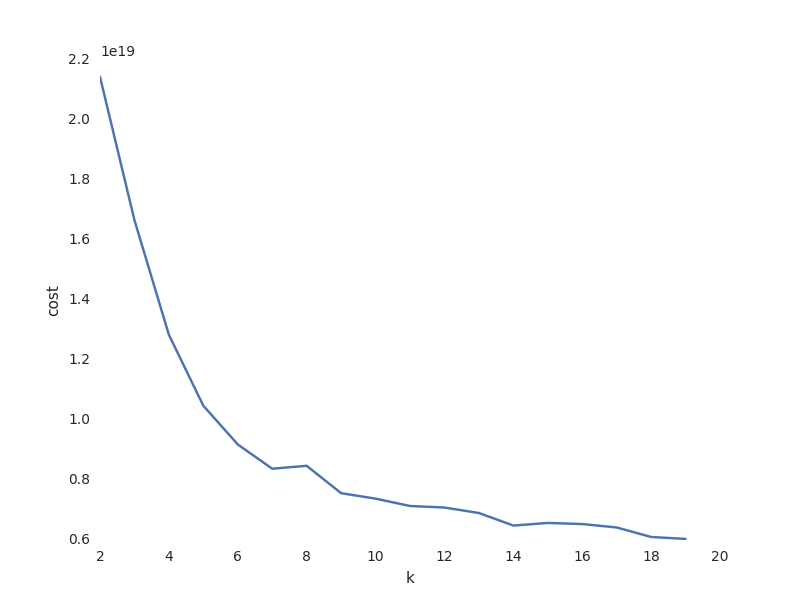

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),k_means_cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
display(fig)

In [68]:
# Looks like k=10 works. We are now ready to train the model on the full dataset
k = 10
k_means_kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("k_means_features")
k_means_model = k_means_kmeans.fit(k_means_encodedData)
centers = k_means_model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[ 1.71182538e+05 4.30786516e+03 1.45118798e+05 1.50758983e+00]
[ 8.49452083e+08 0.00000000e+00 8.49452083e+08 1.30498333e+00]
[ 7.73668194e+06 5.09075049e+06 1.65125510e+06 1.77947907e+00]
[ 3.40493784e+08 0.00000000e+00 3.40493784e+08 1.22506981e+00]
[ 8.26742562e+07 4.21383685e+04 8.18407745e+07 1.84460769e+00]
[ 7.43431799e+06 7.78224911e+04 7.35649550e+06 1.83163737e+00]
[ 2.60375354e+07 5.94113536e+05 2.48258693e+07 1.87559128e+00]
[ 5.73358366e+08 0.00000000e+00 5.73358366e+08 1.30007692e+00]
[ 2.04527737e+08 0.00000000e+00 2.04527737e+08 1.37831200e+00]
[ 1.53679818e+06 1.44355148e+05 1.31121757e+06 1.72456945e+00]

In [69]:
display(centers)

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-1839725582735574> in <module> () 
 ----> 1 display ( centers ) 

 /local_disk0/tmp/1559497257754-0/PythonShell.py in display (self, input, *args, **kwargs) 
 828 self . displayRDD = input . _jdf 
 829 elif isinstance ( input , list ) : 
 --> 830 self . displayRDD = self . sparkSession . createDataFrame ( input ) . _jdf 
 831 elif type ( input ) is mpl . figure . Figure : 
 832 _format = 'png' 

 /databricks/spark/python/pyspark/sql/session.py in createDataFrame (self, data, schema, samplingRatio, verifySchema) 
 808 rdd , schema = self . _createFromRDD ( data . map ( prepare ) , schema , samplingRatio ) 
 809 else : 
 --> 810 rdd , schema = self . _createFromLocal ( map ( prepare , data ) , schema ) 
 811 jrdd = self . _jvm . SerDeUtil . toJavaArray ( rdd . _to_java_object_rdd ( ) ) 
 812 jdf = self . _jsparkSession . applySchemaToPythonRDD ( jrdd . rdd ( ) , schema . json ( ) ) 

 /databricks/spark/python/pyspark/sql/session.py in _createFromLocal (self, data, schema) 
 440 write temp files . 
 441 """
 --> 442 data , schema = self . _wrap_data_schema ( data , schema ) 
 443 return self . _sc . parallelize ( data ) , schema 
 444 

 /databricks/spark/python/pyspark/sql/session.py in _wrap_data_schema (self, data, schema) 
 419 
 420 if schema is None or isinstance ( schema , ( list , tuple ) ) : 
 --> 421 struct = self . _inferSchemaFromList ( data , names = schema ) 
 422 converter = _create_converter ( struct ) 
 423 data = map ( converter , data ) 

 /databricks/spark/python/pyspark/sql/session.py in _inferSchemaFromList (self, data, names) 
 355 warnings.warn("inferring schema from dict is deprecated,"
 356 "please use pyspark.sql.Row instead")
 --> 357 schema = reduce ( _merge_type , ( _infer_schema ( row , names ) for row in data ) ) 
 358 if _has_nulltype ( schema ) : 
 359 raise ValueError ( "Some of types cannot be determined after inferring" ) 

 /databricks/spark/python/pyspark/sql/session.py in <genexpr> (.0) 
 355 warnings.warn("inferring schema from dict is deprecated,"
 356 "please use pyspark.sql.Row instead")
 --> 357 schema = reduce ( _merge_type , ( _infer_schema ( row , names ) for row in data ) ) 
 358 if _has_nulltype ( schema ) : 
 359 raise ValueError ( "Some of types cannot be determined after inferring" ) 

 /databricks/spark/python/pyspark/sql/types.py in _infer_schema (row, names) 
 1060 
 1061 else : 
 -> 1062 raise TypeError ( "Can not infer schema for type: %s" % type ( row ) ) 
 1063 
 1064 fields = [ StructField ( k , _infer_type ( v ) , True ) for k , v in items ] 

 TypeError : Can not infer schema for type: <class 'numpy.ndarray'>

In [70]:
# Assign clusters to events
k_means_transformed = k_means_model.transform(k_means_encodedData)
k_means_transformed.show(5)

+---------------------+--------------------+-----------------------+-------------------+--------------------+----------+
TotalSubmittedCharges|DrugSubmittedCharges|MedicalSubmittedCharges|AverageHCCRiskScore| k_means_features|prediction|
+---------------------+--------------------+-----------------------+-------------------+--------------------+----------+
 167544.0| 0.0| 167544.0| 2.2264|[167544.0,0.0,167...| 0|
 1252948.0| 0.0| 1252948.0| 1.0703|[1252948.0,0.0,12...| 9|
 130786.0| 0.0| 0.0| 1.8967|[130786.0,0.0,0.0...| 0|
 49220.0| 0.0| 49220.0| 1.2687|[49220.0,0.0,4922...| 0|
 310590.0| 0.0| 310590.0| 1.817|[310590.0,0.0,310...| 0|
+---------------------+--------------------+-----------------------+-------------------+--------------------+----------+
only showing top 5 rows

In [71]:
k_means_transformed.select('prediction').distinct().show()

+----------+
prediction|
+----------+
 1|
 6|
 3|
 5|
 9|
 4|
 8|
 7|
 2|
 0|
+----------+

In [72]:
k_means_transformed_pd = k_means_transformed.toPandas()
k_means_transformed_pd.head()

Out[ 665 ]: 
 TotalSubmittedCharges DrugSubmittedCharges MedicalSubmittedCharges \
0 167544.0 0.0 167544.0 
1 1252948.0 0.0 1252948.0 
2 130786.0 0.0 0.0 
3 49220.0 0.0 49220.0 
4 310590.0 0.0 310590.0 

 AverageHCCRiskScore k_means_features prediction 
0 2.2264 [167544.0, 0.0, 167544.0, 2.2264] 0 
1 1.0703 [1252948.0, 0.0, 1252948.0, 1.0703] 9 
2 1.8967 [130786.0, 0.0, 0.0, 1.8967] 0 
3 1.2687 [49220.0, 0.0, 49220.0, 1.2687] 0 
4 1.8170 [310590.0, 0.0, 310590.0, 1.817] 0

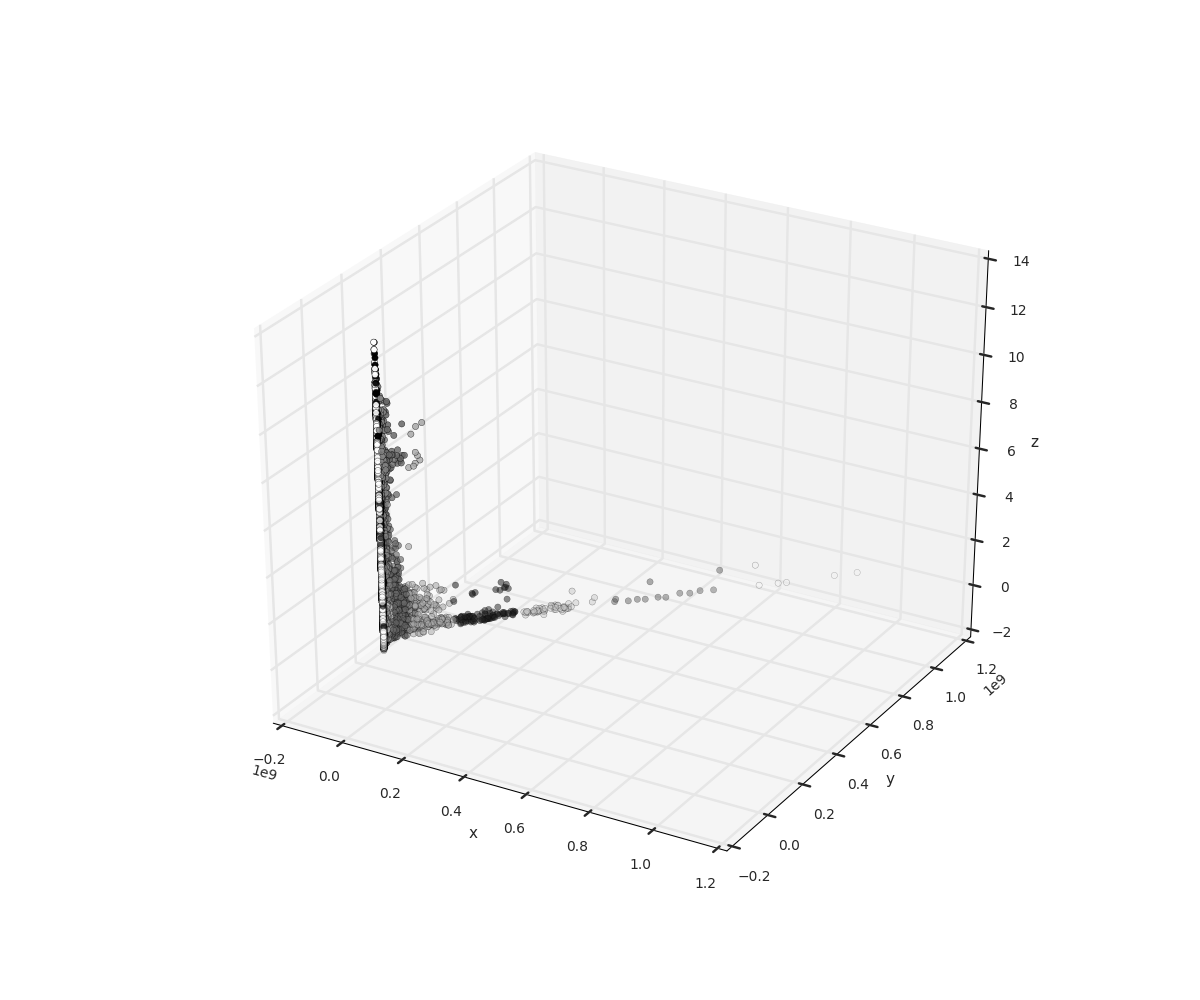

In [73]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import numpy as np

threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
threedee.scatter(k_means_transformed_pd.TotalSubmittedCharges, k_means_transformed_pd.MedicalSubmittedCharges, k_means_transformed_pd.AverageHCCRiskScore, c=k_means_transformed_pd.prediction)
threedee.set_xlabel('x')
threedee.set_ylabel('y')
threedee.set_zlabel('z')
display(plt.show(threedee))

In [74]:
display(k_means_kmeans, k_means_transformed)

--------------------------------------------------------------------------- 
 Exception Traceback (most recent call last)
 <command-1839725582735579> in <module> () 
 ----> 1 display ( k_means_kmeans , k_means_transformed ) 

 /local_disk0/tmp/1559497257754-0/PythonShell.py in display (self, input, *args, **kwargs) 
 856 else : 
 857 raise Exception("ML model display does not yet support model type %s." \
 --> 858 % type(input))
 859 elif input is not None and "help" in dir ( input ) : # Is this object documented DBC-style? 
 860 input . help ( ) # This is going to display the help as a side-effect 

 Exception : ML model display does not yet support model type <class 'pyspark.ml.clustering.KMeans'>.

## ML

In [76]:
#show the column contents for the AverageHCCRiskScore, i.e. count=4936683, mean = 1.54, stddev=0.75, min = 0.27, max = 13.28
#encodedData.select('AverageHCCRiskScore').describe().show()

In [77]:
data_mi=df_combined_all

In [78]:
data_mi.dropna().count()

Out[ 535 ]: 0

In [79]:
data_mi.printSchema()

root
-- NPI: integer (nullable = true)
-- LastName: string (nullable = true)
-- FirstName: string (nullable = true)
-- MiddleInitial: string (nullable = true)
-- Credentials: string (nullable = true)
-- Gender: string (nullable = true)
-- EntityCode: string (nullable = true)
-- Address1: string (nullable = true)
-- Address2: string (nullable = true)
-- City: string (nullable = true)
-- Zip: string (nullable = true)
-- State: string (nullable = true)
-- Country: string (nullable = true)
-- ProviderType: string (nullable = true)
-- MPI: string (nullable = true)
-- HCPCSCount: integer (nullable = true)
-- ServicesCount: double (nullable = true)
-- UniqueBeneficiariesCount: integer (nullable = true)
-- TotalSubmittedCharges: double (nullable = true)
-- TotalAllowedAmount: double (nullable = true)
-- TotalPaymentAmount: double (nullable = true)
-- DSI: string (nullable = true)
-- HCPCSDrugCount: integer (nullable = true)
-- DrugServicesCount: double (nullable = true)
-- UniqueBeneficiariesDrugCount: integer (nullable = true)
-- DrugSubmittedCharges: double (nullable = true)
-- DrugAllowedAmount: double (nullable = true)
-- DrugPaymentAmount: double (nullable = true)
-- MSI: string (nullable = true)
-- HCPCSMedicalCount: integer (nullable = true)
-- MedicalServicesCount: double (nullable = true)
-- UniqueBeneficiariesMedicalCount: integer (nullable = true)
-- MedicalSubmittedCharges: double (nullable = true)
-- MedicalAllowedAmount: double (nullable = true)
-- MedicalPaymentAmount: double (nullable = true)
-- AverageBeneficiaryAge: integer (nullable = true)
-- BeneficiaryCountLessThan65: integer (nullable = true)
-- BeneficiaryCount65To74: integer (nullable = true)
-- BeneficiaryCount75To84: integer (nullable = true)
-- BeneficiaryCountMoreThan84: integer (nullable = true)
-- FemaleBeneficiaryCount: integer (nullable = true)
-- MaleBeneficiaryCount: integer (nullable = true)
-- NonHispanicWhiteBeneficaryCount: integer (nullable = true)
-- BlackOrAfricanAmericanBeneficaryCount: integer (nullable = true)
-- AsianPacificIslanderBeneficaryCount: integer (nullable = true)
-- HispanicBeneficaryCount: integer (nullable = true)
-- AmericanIndianAlaskaNativeBeneficaryCount: integer (nullable = true)
-- RaceNotClassifiedBeneficaryCount: integer (nullable = true)
-- MedicareOnlyBeneficaryCount: integer (nullable = true)
-- MedicareAndMedicaidBeneficaryCount: integer (nullable = true)
-- AlzheimersDementiaBeneficiaryPercent: integer (nullable = true)
-- AsthmaBeneficiaryPercent: integer (nullable = true)
-- AtrialFibrillationBeneficiaryPercent: integer (nullable = true)
-- CancerBeneficiaryPercent: integer (nullable = true)
-- KidneyBeneficiaryPercent: integer (nullable = true)
-- PulmonaryBeneficiaryPercent: integer (nullable = true)
-- DepressionBeneficiaryPercent: integer (nullable = true)
-- DiabetesBeneficiaryPercent: integer (nullable = true)
-- HeartFailureBeneficiaryPercent: integer (nullable = true)
-- HyperlipidemiaBeneficiaryPercent: integer (nullable = true)
-- HypertensionBeneficiaryPercent: integer (nullable = true)
-- IschemicDiseaseBeneficiaryPercent: integer (nullable = true)
-- OsteoporosisBeneficiaryPercent: integer (nullable = true)
-- ArthritisBeneficiaryPercent: integer (nullable = true)
-- PsychoticBeneficiaryPercent: integer (nullable = true)
-- StrokeBeneficiaryPercent: integer (nullable = true)
-- AverageHCCRiskScore: double (nullable = true)
-- zipcode: integer (nullable = true)
-- AverageIncome: double (nullable = true)

In [80]:
#QuantileDiscretizer takes a column with continuous features and outputs a column with binned categorical features. The number of bins is set by the numBuckets parameter. It is possible that the number of buckets used will be smaller than this value, for example, if there are too few distinct values of the input to create enough distinct quantiles.

from pyspark.ml.feature import QuantileDiscretizer

#High Medium Low
discretizer_mi = QuantileDiscretizer(numBuckets=3, inputCol="AverageHCCRiskScore", outputCol="hcc_category")
data_mi = discretizer_mi.fit(data_mi).transform(data_mi)
data_mi.show(3)

+----------+---------+---------+-------------+-----------+------+----------+--------------------+-----------------+----------+-----+-----+-------+-----------------+---+----------+-------------+------------------------+---------------------+------------------+------------------+----+--------------+-----------------+----------------------------+--------------------+-----------------+-----------------+----+-----------------+--------------------+-------------------------------+-----------------------+--------------------+--------------------+---------------------+--------------------------+----------------------+----------------------+--------------------------+----------------------+--------------------+-------------------------------+-------------------------------------+-----------------------------------+-----------------------+-----------------------------------------+--------------------------------+---------------------------+----------------------------------+------------------------------------+------------------------+------------------------------------+------------------------+------------------------+---------------------------+----------------------------+--------------------------+------------------------------+--------------------------------+------------------------------+---------------------------------+------------------------------+---------------------------+---------------------------+------------------------+-------------------+-------+------------------+------------+
 NPI| LastName|FirstName|MiddleInitial|Credentials|Gender|EntityCode| Address1| Address2| City| Zip|State|Country| ProviderType|MPI|HCPCSCount|ServicesCount|UniqueBeneficiariesCount|TotalSubmittedCharges|TotalAllowedAmount|TotalPaymentAmount| DSI|HCPCSDrugCount|DrugServicesCount|UniqueBeneficiariesDrugCount|DrugSubmittedCharges|DrugAllowedAmount|DrugPaymentAmount| MSI|HCPCSMedicalCount|MedicalServicesCount|UniqueBeneficiariesMedicalCount|MedicalSubmittedCharges|MedicalAllowedAmount|MedicalPaymentAmount|AverageBeneficiaryAge|BeneficiaryCountLessThan65|BeneficiaryCount65To74|BeneficiaryCount75To84|BeneficiaryCountMoreThan84|FemaleBeneficiaryCount|MaleBeneficiaryCount|NonHispanicWhiteBeneficaryCount|BlackOrAfricanAmericanBeneficaryCount|AsianPacificIslanderBeneficaryCount|HispanicBeneficaryCount|AmericanIndianAlaskaNativeBeneficaryCount|RaceNotClassifiedBeneficaryCount|MedicareOnlyBeneficaryCount|MedicareAndMedicaidBeneficaryCount|AlzheimersDementiaBeneficiaryPercent|AsthmaBeneficiaryPercent|AtrialFibrillationBeneficiaryPercent|CancerBeneficiaryPercent|KidneyBeneficiaryPercent|PulmonaryBeneficiaryPercent|DepressionBeneficiaryPercent|DiabetesBeneficiaryPercent|HeartFailureBeneficiaryPercent|HyperlipidemiaBeneficiaryPercent|HypertensionBeneficiaryPercent|IschemicDiseaseBeneficiaryPercent|OsteoporosisBeneficiaryPercent|ArthritisBeneficiaryPercent|PsychoticBeneficiaryPercent|StrokeBeneficiaryPercent|AverageHCCRiskScore|zipcode| AverageIncome|hcc_category|
+----------+---------+---------+-------------+-----------+------+----------+--------------------+-----------------+----------+-----+-----+-------+-----------------+---+----------+-------------+------------------------+---------------------+------------------+------------------+----+--------------+-----------------+----------------------------+--------------------+-----------------+-----------------+----+-----------------+--------------------+-------------------------------+-----------------------+--------------------+--------------------+---------------------+--------------------------+----------------------+----------------------+--------------------------+----------------------+--------------------+-------------------------------+-------------------------------------+-----------------------------------+-----------------------+-----------------------------------------+--------------------------------+---------------------------+----------------------------------+------------------------------------

In [81]:
#According to Bharat's missing value table
#drop everything irrelevant and everything has more than 30% of missing values, 17 columns

#drop "AverageHCCRiskScore", too. It is a strong indicator for hcc_category
#drop Zip too, because it will generate too many after one-hot encoding
columns_to_drop_mi = ['NPI', 'LastName', 'FirstName', 'MiddleInitial', 'Credentials', 'Gender', 'Address1', 'Address2', 'City', 'State', 'Country', 'MPI', 'zipcode','DSI','MSI','RaceNotClassifiedBeneficaryCount','AsianPacificIslanderBeneficaryCount','HispanicBeneficaryCount','AmericanIndianAlaskaNativeBeneficaryCount','BlackOrAfricanAmericanBeneficaryCount','PsychoticBeneficiaryPercent','StrokeBeneficiaryPercent','BeneficiaryCountMoreThan84','OsteoporosisBeneficiaryPercent','AsthmaBeneficiaryPercent','NonHispanicWhiteBeneficaryCount','BeneficiaryCountLessThan65','CancerBeneficiaryPercent','AlzheimersDementiaBeneficiaryPercent','AtrialFibrillationBeneficiaryPercent','AverageHCCRiskScore',"Zip"]
data_mi=data_mi.drop(*columns_to_drop_mi)

In [82]:
# now let's see how many categorical and numerical features we have:
cat_cols_mi = [item[0] for item in data_mi.dtypes if item[1].startswith('string')] 
print(str(len(cat_cols_mi)) + '  categorical features')
num_cols_mi = [item[0] for item in data_mi.dtypes if item[1].startswith('int') | item[1].startswith('double')]
print(str(len(num_cols_mi)) + '  numerical features')

2 categorical features
35 numerical features

In [83]:
num_cols_mi

Out[ 544 ]: 
['HCPCSCount',
 'ServicesCount',
 'UniqueBeneficiariesCount',
 'TotalSubmittedCharges',
 'TotalAllowedAmount',
 'TotalPaymentAmount',
 'HCPCSDrugCount',
 'DrugServicesCount',
 'UniqueBeneficiariesDrugCount',
 'DrugSubmittedCharges',
 'DrugAllowedAmount',
 'DrugPaymentAmount',
 'HCPCSMedicalCount',
 'MedicalServicesCount',
 'UniqueBeneficiariesMedicalCount',
 'MedicalSubmittedCharges',
 'MedicalAllowedAmount',
 'MedicalPaymentAmount',
 'AverageBeneficiaryAge',
 'BeneficiaryCount65To74',
 'BeneficiaryCount75To84',
 'FemaleBeneficiaryCount',
 'MaleBeneficiaryCount',
 'MedicareOnlyBeneficaryCount',
 'MedicareAndMedicaidBeneficaryCount',
 'KidneyBeneficiaryPercent',
 'PulmonaryBeneficiaryPercent',
 'DepressionBeneficiaryPercent',
 'DiabetesBeneficiaryPercent',
 'HeartFailureBeneficiaryPercent',
 'HyperlipidemiaBeneficiaryPercent',
 'HypertensionBeneficiaryPercent',
 'IschemicDiseaseBeneficiaryPercent',
 'ArthritisBeneficiaryPercent',
 'AverageIncome']

In [84]:
data_mi = data_mi.na.fill(0)

In [85]:
from pyspark.ml.feature import VectorAssembler

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator

#convert relevant categorical into one hot encoded
indexer1_mi = StringIndexer(inputCol="EntityCode", outputCol="EntityCodeIdx").setHandleInvalid("skip")
indexer2_mi = StringIndexer(inputCol="ProviderType", outputCol="ProviderTypeIdx").setHandleInvalid("skip")

#gather all indexers as inputs to the One Hot Encoder
inputs_mi = [indexer1_mi.getOutputCol(), indexer2_mi.getOutputCol()]

#create the one hot encoder
encoder_outputs_mi = ["EntityCodeVec", "ProviderTypeVec"]
encoder_mi = OneHotEncoderEstimator(inputCols=inputs_mi, outputCols=encoder_outputs_mi)

#run it through a pipeline
pipeline_mi = Pipeline(stages=[indexer1_mi, indexer2_mi,  encoder_mi])
encodedData_mi = pipeline_mi.fit(data_mi).transform(data_mi)

In [86]:
encoder_outputs_mi

Out[ 551 ]: ['EntityCodeVec', 'ProviderTypeVec']

In [87]:
#gather feature vector and identify features
features = encoder_outputs_mi + num_cols_mi
assembler_mi = VectorAssembler(inputCols = features, outputCol = 'features')
encodedData_mi = assembler_mi.transform(encodedData_mi)

--------------------------------------------------------------------------- 
 IllegalArgumentException Traceback (most recent call last)
 <command-1839725582735661> in <module> () 
 2 features = encoder_outputs_mi + num_cols_mi 
 3 assembler_mi = VectorAssembler ( inputCols = features , outputCol = 'features' ) 
 ----> 4 encodedData_mi = assembler_mi . transform ( encodedData_mi ) 

 /databricks/spark/python/pyspark/ml/base.py in transform (self, dataset, params) 
 171 return self . copy ( params ) . _transform ( dataset ) 
 172 else : 
 --> 173 return self . _transform ( dataset ) 
 174 else : 
 175 raise ValueError ( "Params must be a param map but got %s." % type ( params ) ) 

 /databricks/spark/python/pyspark/ml/wrapper.py in _transform (self, dataset) 
 310 def _transform ( self , dataset ) : 
 311 self . _transfer_params_to_java ( ) 
 --> 312 return DataFrame ( self . _java_obj . transform ( dataset . _jdf ) , dataset . sql_ctx ) 
 313 
 314 

 /databricks/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1255 answer = self . gateway_client . send_command ( command ) 
 1256 return_value = get_return_value(
 -> 1257 answer, self.gateway_client, self.target_id, self.name)
 1258 
 1259 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 77 raise QueryExecutionException ( s . split ( ': ' , 1 ) [ 1 ] , stackTrace ) 
 78 if s . startswith ( 'java.lang.IllegalArgumentException: ' ) : 
 ---> 79 raise IllegalArgumentException ( s . split ( ': ' , 1 ) [ 1 ] , stackTrace ) 
 80 raise 
 81 return deco 

 IllegalArgumentException : 'Output column features already exists.'

In [88]:
display(encodedData_mi)

NPI LastName FirstName MiddleInitial Credentials Gender EntityCode Address1 Address2 City Zip State Country ProviderType MPI HCPCSCount ServicesCount UniqueBeneficiariesCount TotalSubmittedCharges TotalAllowedAmount TotalPaymentAmount DSI HCPCSDrugCount DrugServicesCount UniqueBeneficiariesDrugCount DrugSubmittedCharges DrugAllowedAmount DrugPaymentAmount MSI HCPCSMedicalCount MedicalServicesCount UniqueBeneficiariesMedicalCount MedicalSubmittedCharges MedicalAllowedAmount MedicalPaymentAmount AverageBeneficiaryAge BeneficiaryCountLessThan65 BeneficiaryCount65To74 BeneficiaryCount75To84 BeneficiaryCountMoreThan84 FemaleBeneficiaryCount MaleBeneficiaryCount NonHispanicWhiteBeneficaryCount BlackOrAfricanAmericanBeneficaryCount AsianPacificIslanderBeneficaryCount HispanicBeneficaryCount AmericanIndianAlaskaNativeBeneficaryCount RaceNotClassifiedBeneficaryCount MedicareOnlyBeneficaryCount MedicareAndMedicaidBeneficaryCount AlzheimersDementiaBeneficiaryPercent AsthmaBeneficiaryPercent AtrialFibrillationBeneficiaryPercent CancerBeneficiaryPercent KidneyBeneficiaryPercent PulmonaryBeneficiaryPercent DepressionBeneficiaryPercent DiabetesBeneficiaryPercent HeartFailureBeneficiaryPercent HyperlipidemiaBeneficiaryPercent HypertensionBeneficiaryPercent IschemicDiseaseBeneficiaryPercent OsteoporosisBeneficiaryPercent ArthritisBeneficiaryPercent PsychoticBeneficiaryPercent StrokeBeneficiaryPercent AverageHCCRiskScore zipcode AverageIncome hcc_category EntityCodeIdx ProviderTypeIdx EntityCodeVec ProviderTypeVec features 1003000126 ENKESHAFI ARDALAN null M.D. M I 900 SETON DR null CUMBERLAND 21502 MD US Internal Medicine Y 16 1243.0 581 167544.0 113956.76 90965.51 null 0 0.0 0 0.0 0.0 0.0 null 16 1243.0 581 167544.0 113956.76 90965.51 76 89 141 187 164 309 272 564 0 0 0 0 0 399 182 34 10 24 18 59 41 40 51 53 65 75 66 14 47 14 19 2.2264 21502 126011.83333333333 2.0 0.0 0.0 List(0, 1, List(0), List(1.0)) List(0, 117, List(0), List(1.0)) List(0, 153, List(0, 1, 118, 119, 120, 121, 122, 123, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152), List(1.0, 1.0, 16.0, 1243.0, 581.0, 167544.0, 113956.76, 90965.51, 16.0, 1243.0, 581.0, 167544.0, 113956.76, 90965.51, 76.0, 141.0, 187.0, 309.0, 272.0, 399.0, 182.0, 59.0, 41.0, 40.0, 51.0, 53.0, 65.0, 75.0, 66.0, 47.0, 126011.83333333333)) 1003000134 CIBULL THOMAS L M.D. M I 2650 RIDGE AVE EVANSTON HOSPITAL EVANSTON 60201 IL US Pathology Y 12 7692.0 3824 1252948.0 287790.97 221909.92 null 0 0.0 0 0.0 0.0 0.0 null 12 7692.0 3824 1252948.0 287790.97 221909.92 76 93 1594 1454 683 1927 1897 3677 33 37 56 0 0 3682 142 6 5 12 12 15 9 11 21 13 55 59 31 8 36 2 4 1.0703 60201 413264.8333333333 0.0 0.0 24.0 List(0, 1, List(0), List(1.0)) List(0, 117, List(24), List(1.0)) List(0, 153, List(0, 25, 118, 119, 120, 121, 122, 123, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152), List(1.0, 1.0, 12.0, 7692.0, 3824.0, 1252948.0, 287790.97, 221909.92, 12.0, 7692.0, 3824.0, 1252948.0, 287790.97, 221909.92, 76.0, 1594.0, 1454.0, 1927.0, 1897.0, 3682.0, 142.0, 15.0, 9.0, 11.0, 21.0, 13.0, 55.0, 59.0, 31.0, 36.0, 413264.8333333333)) 1003000142 KHALIL RASHID null M.D. M I 4126 N HOLLAND SYLVANIA RD SUITE 220 TOLEDO 43623 OH US Anesthesiology Y 69 247.0 119 130786.0 32496.68 25675.78 * 0 0.0 0 0.0 0.0 0.0 # 0 0.0 0 0.0 0.0 0.0 67 41 43 22 13 71 48 88 0 0 0 0 0 78 41 15 14 9 12 34 30 43 50 31 63 75 47 13 75 0 0 1.8967 43623 98848.83333333333 2.0 0.0 6.0 List(0, 1, List(0), List(1.0)) List(0, 117, List(6), List(1.0)) List(0, 153, List(0, 7, 118, 119, 120, 121, 122, 123, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152), List(1.0, 1.0, 69.0, 247.0, 119.0, 130786.0, 32496.68, 25675.78, 67.0, 43.0, 22.0, 71.0, 48.0, 78.0, 41.0, 34.0, 30.0, 43.0, 50.0, 31.0, 63.0, 75.0, 47.0, 75.0, 98848.83333333333)) 1003000381 BRAGANZA LUTHER Q PT M I 134 N OLD DIXIE HWY null LADY LAKE 321

In [89]:
columns_to_drop_mi = ['NPI', 'LastName', 'FirstName', 'MiddleInitial', 'Credentials', 'Gender', 'Address1', 'Address2', 'City', 'State', 'Country', 'MPI', 'zipcode','DSI','MSI','RaceNotClassifiedBeneficaryCount','AsianPacificIslanderBeneficaryCount','HispanicBeneficaryCount','AmericanIndianAlaskaNativeBeneficaryCount','BlackOrAfricanAmericanBeneficaryCount','PsychoticBeneficiaryPercent','StrokeBeneficiaryPercent','BeneficiaryCountMoreThan84','OsteoporosisBeneficiaryPercent','AsthmaBeneficiaryPercent','NonHispanicWhiteBeneficaryCount','BeneficiaryCountLessThan65','CancerBeneficiaryPercent','AlzheimersDementiaBeneficiaryPercent','AtrialFibrillationBeneficiaryPercent','AverageHCCRiskScore',"Zip"]
encodedData_mi=encodedData_mi.drop(*columns_to_drop_mi)

In [90]:

#split df_physicians_all_ml into train and test
train_df_mi, test_df_mi = encodedData_mi.randomSplit([.8,.2],seed=1234)
train_df_mi.show(1)

+----------+------------------+----------+-------------+------------------------+---------------------+------------------+------------------+--------------+-----------------+----------------------------+--------------------+-----------------+-----------------+-----------------+--------------------+-------------------------------+-----------------------+--------------------+--------------------+---------------------+----------------------+----------------------+----------------------+--------------------+---------------------------+----------------------------------+------------------------+---------------------------+----------------------------+--------------------------+------------------------------+--------------------------------+------------------------------+---------------------------------+---------------------------+-----------------+------------+-------------+---------------+-------------+-----------------+--------------------+
EntityCode| ProviderType|HCPCSCount|ServicesCount|UniqueBeneficiariesCount|TotalSubmittedCharges|TotalAllowedAmount|TotalPaymentAmount|HCPCSDrugCount|DrugServicesCount|UniqueBeneficiariesDrugCount|DrugSubmittedCharges|DrugAllowedAmount|DrugPaymentAmount|HCPCSMedicalCount|MedicalServicesCount|UniqueBeneficiariesMedicalCount|MedicalSubmittedCharges|MedicalAllowedAmount|MedicalPaymentAmount|AverageBeneficiaryAge|BeneficiaryCount65To74|BeneficiaryCount75To84|FemaleBeneficiaryCount|MaleBeneficiaryCount|MedicareOnlyBeneficaryCount|MedicareAndMedicaidBeneficaryCount|KidneyBeneficiaryPercent|PulmonaryBeneficiaryPercent|DepressionBeneficiaryPercent|DiabetesBeneficiaryPercent|HeartFailureBeneficiaryPercent|HyperlipidemiaBeneficiaryPercent|HypertensionBeneficiaryPercent|IschemicDiseaseBeneficiaryPercent|ArthritisBeneficiaryPercent| AverageIncome|hcc_category|EntityCodeIdx|ProviderTypeIdx|EntityCodeVec| ProviderTypeVec| features|
+----------+------------------+----------+-------------+------------------------+---------------------+------------------+------------------+--------------+-----------------+----------------------------+--------------------+-----------------+-----------------+-----------------+--------------------+-------------------------------+-----------------------+--------------------+--------------------+---------------------+----------------------+----------------------+----------------------+--------------------+---------------------------+----------------------------------+------------------------+---------------------------+----------------------------+--------------------------+------------------------------+--------------------------------+------------------------------+---------------------------------+---------------------------+-----------------+------------+-------------+---------------+-------------+-----------------+--------------------+
 I|Addiction Medicine| 10| 308.0| 60| 44175.95| 20749.75| 12490.99| 0| 0.0| 0| 0.0| 0.0| 0.0| 10| 308.0| 60| 44175.95| 20749.75| 12490.99| 71| 0| 17| 35| 25| 34| 26| 28| 30| 33| 28| 40| 43| 67| 55| 40|70357.83333333333| 2.0| 0.0| 100.0|(1,[0],[1.0])|(117,[100],[1.0])|(153,[0,101,118,1...|
+----------+------------------+----------+-------------+------------------------+---------------------+------------------+------------------+--------------+-----------------+----------------------------+--------------------+-----------------+-----------------+-----------------+--------------------+-------------------------------+-----------------------+--------------------+--------------------+---------------------+----------------------+----------------------+----------------------+--------------------+---------------------------+----------------------------------+------------------------+---------------------------+----------------------------+--------------------------+------------------------------+--------------------------------+------------------------------+---------------------------------+---------------------------+-----------------+------------+---

In [91]:
#Classification
#Let us try to predict the hcc_category using logistic regression
from pyspark.ml.classification import LogisticRegression
# Set parameters for Logistic Regression
lgr = LogisticRegression(maxIter=10, featuresCol = 'features', labelCol='hcc_category')
# Fit the model to the data.
lgrm = lgr.fit(train_df_mi)
# Given a dataset, predict each point's label, and show the results.
predictions = lgrm.transform(test_df_mi)

In [92]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#print evaluation metrics
evaluator_lr = MulticlassClassificationEvaluator(labelCol="hcc_category", predictionCol="prediction")

print(evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print(evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

0.7511075775677308
0.7517462316053793

In [93]:
print(evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"}))
print(evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"}))

0.7511075775677308
0.7526342039623035

In [94]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionAndLabel = predictions.select("prediction", "hcc_category").rdd
# Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel)
print(metrics.confusionMatrix())

DenseMatrix([[ 243299., 71672., 564.],
 [ 65770., 202983., 42191.],
 [ 14046., 39295., 258489.]])

In [95]:
m=metrics.confusionMatrix()
rows = m.toArray().tolist()
df_m = spark.createDataFrame(rows,['Low','Medium','High'])
df_m.show()

+--------+--------+--------+
 Low| Medium| High|
+--------+--------+--------+
243299.0| 71672.0| 564.0|
 65770.0|202983.0| 42191.0|
 14046.0| 39295.0|258489.0|
+--------+--------+--------+

In [97]:
#RF model depth 1 numTress1
from pyspark.ml.classification import RandomForestClassifier

# Set parameters for the Random Forest.
rfc_0 = RandomForestClassifier(maxDepth=1, numTrees=1, impurity="gini", labelCol="hcc_category", featuresCol="features")

# Fit the model to the data.
rfcm_0 = rfc_0.fit(train_df_mi)

# Given a dataset, predict each point's label, and show the results.
predictions_0 = rfcm_0.transform(test_df_mi)

In [98]:
#print evaluation metrics
print(evaluator.evaluate(predictions_0, {evaluator.metricName: "accuracy"}))
print(evaluator.evaluate(predictions_0, {evaluator.metricName: "f1"}))

0.6059006148294431
0.49474607987763775

In [99]:
feature_importance = ExtractFeatureImp(rfcm_0.featureImportances,encodedData_mi, "features")
feature_importance

Out[ 571 ]: 
 idx name score
143 143 KidneyBeneficiaryPercent 1.0
0 0 EntityCodeVec_I 0.0
98 98 ProviderTypeVec_Gynecological Oncology 0.0
99 99 ProviderTypeVec_Sleep Medicine 0.0
100 100 ProviderTypeVec_Geriatric Psychiatry 0.0
101 101 ProviderTypeVec_Addiction Medicine 0.0
102 102 ProviderTypeVec_Unknown Physician Specialty Code 0.0
103 103 ProviderTypeVec_Neuropsychiatry 0.0
104 104 ProviderTypeVec_Clinic or Group Practice 0.0
105 105 ProviderTypeVec_Portable X-Ray Supplier 0.0
96 96 ProviderTypeVec_Oral Surgery (Dentists only) 0.0
106 106 ProviderTypeVec_Peripheral Vascular Disease 0.0
107 107 ProviderTypeVec_Undefined Physician type 0.0
108 108 ProviderTypeVec_Public Health or Welfare Agency 0.0
109 109 ProviderTypeVec_Radiation Therapy 0.0
110 110 ProviderTypeVec_Unknown Supplier/Provider 0.0
111 111 ProviderTypeVec_Slide Preparation Facility 0.0
112 112 ProviderTypeVec_Mammographic Screening Center 0.0
97 97 ProviderTypeVec_Psychologist (billing independ... 0.0
95 95 ProviderTypeVec_Colorectal Surgery (Proctology) 0.0
114 114 ProviderTypeVec_Pharmacy 0.0
94 94 ProviderTypeVec_Portable X-ray 0.0
79 79 ProviderTypeVec_Gynecological/Oncology 0.0
80 80 ProviderTypeVec_Allergy/ Immunology 0.0
81 81 ProviderTypeVec_Sports Medicine 0.0
82 82 ProviderTypeVec_Hematology 0.0
83 83 ProviderTypeVec_Osteopathic Manipulative Medicine 0.0
84 84 ProviderTypeVec_Speech Language Pathologist 0.0
85 85 ProviderTypeVec_Hospice and Palliative Care 0.0
86 86 ProviderTypeVec_Independent Diagnostic Testing... 0.0
.. ... ... ...
65 65 ProviderTypeVec_Registered Dietician/Nutrition... 0.0
66 66 ProviderTypeVec_Hand Surgery 0.0
67 67 ProviderTypeVec_Audiologist 0.0
68 68 ProviderTypeVec_Interventional Radiology 0.0
69 69 ProviderTypeVec_Oral Surgery (dentists only) 0.0
70 70 ProviderTypeVec_Anesthesiologist Assistants 0.0
71 71 ProviderTypeVec_Cardiac Electrophysiology 0.0
72 72 ProviderTypeVec_Colorectal Surgery (formerly p... 0.0
73 73 ProviderTypeVec_Occupational Therapist in Priv... 0.0
74 74 ProviderTypeVec_Maxillofacial Surgery 0.0
59 59 ProviderTypeVec_Interventional Pain Management 0.0
57 57 ProviderTypeVec_Thoracic Surgery 0.0
40 40 ProviderTypeVec_Endocrinology 0.0
56 56 ProviderTypeVec_Certified Clinical Nurse Speci... 0.0
41 41 ProviderTypeVec_Infectious Disease 0.0
42 42 ProviderTypeVec_Audiologist (billing independe... 0.0
43 43 ProviderTypeVec_Plastic and Reconstructive Sur... 0.0
44 44 ProviderTypeVec_Neurosurgery 0.0
45 45 ProviderTypeVec_Rheumatology 0.0
46 46 ProviderTypeVec_Radiation Oncology 0.0
47 47 ProviderTypeVec_Cardiovascular Disease (Cardio... 0.0
48 48 ProviderTypeVec_Occupational therapist 0.0
49 49 ProviderTypeVec_Psychologist, Clinical 0.0
50 50 ProviderTypeVec_Vascular Surgery 0.0
51 51 ProviderTypeVec_Allergy/Immunology 0.0
52 52 ProviderTypeVec_Medical Oncology 0.0
53 53 ProviderTypeVec_Independent Diagnostic Testing... 0.0
54 54 ProviderTypeVec_Critical Care (Intensivists) 0.0
55 55 ProviderTypeVec_Clinical Laboratory 0.0
152 152 AverageIncome 0.0

[153 rows x 3 columns]

In [100]:
rfcm_0.featureImportances

Out[ 572 ]: SparseVector(153, {143: 1.0})

In [101]:
#RF model 4,5
from pyspark.ml.classification import RandomForestClassifier
# Set parameters for the Random Forest.
rfc_1 = RandomForestClassifier(maxDepth=4, numTrees=5, impurity="gini", labelCol="hcc_category", predictionCol="prediction")
# Fit the model to the data.
rfcm_1 = rfc_1.fit(train_df_mi)
# Given a dataset, predict each point's label, and show the results.
predictions_1 = rfcm_1.transform(test_df_mi)

In [102]:
#print evaluation metrics
print(evaluator.evaluate(predictions_1, {evaluator.metricName: "accuracy"}))
print(evaluator.evaluate(predictions_1, {evaluator.metricName: "f1"}))

0.6921046265142933
0.674933450876463

In [103]:
ExtractFeatureImp(rfcm_1.featureImportances,encodedData_mi, "features")

Out[ 576 ]: 
 idx name score
149 149 HypertensionBeneficiaryPercent 0.214001
150 150 IschemicDiseaseBeneficiaryPercent 0.179383
143 143 KidneyBeneficiaryPercent 0.125677
147 147 HeartFailureBeneficiaryPercent 0.097892
142 142 MedicareAndMedicaidBeneficaryCount 0.083897
124 124 HCPCSDrugCount 0.043151
120 120 UniqueBeneficiariesCount 0.040290
145 145 DepressionBeneficiaryPercent 0.033792
133 133 MedicalSubmittedCharges 0.030175
128 128 DrugAllowedAmount 0.022057
6 6 ProviderTypeVec_Chiropractic 0.020213
136 136 AverageBeneficiaryAge 0.018567
151 151 ArthritisBeneficiaryPercent 0.016029
146 146 DiabetesBeneficiaryPercent 0.014488
130 130 HCPCSMedicalCount 0.014092
144 144 PulmonaryBeneficiaryPercent 0.013027
119 119 ServicesCount 0.009571
125 125 DrugServicesCount 0.008304
141 141 MedicareOnlyBeneficaryCount 0.008145
10 10 ProviderTypeVec_Optometry 0.005041
139 139 FemaleBeneficiaryCount 0.001341
127 127 DrugSubmittedCharges 0.000849
134 134 MedicalAllowedAmount 0.000010
131 131 MedicalServicesCount 0.000009
101 101 ProviderTypeVec_Addiction Medicine 0.000000
91 91 ProviderTypeVec_Clinical Cardiatric Electrophy... 0.000000
92 92 ProviderTypeVec_Anesthesiology Assistant 0.000000
93 93 ProviderTypeVec_Preventive Medicine 0.000000
102 102 ProviderTypeVec_Unknown Physician Specialty Code 0.000000
96 96 ProviderTypeVec_Oral Surgery (Dentists only) 0.000000
.. ... ... ...
66 66 ProviderTypeVec_Hand Surgery 0.000000
67 67 ProviderTypeVec_Audiologist 0.000000
68 68 ProviderTypeVec_Interventional Radiology 0.000000
69 69 ProviderTypeVec_Oral Surgery (dentists only) 0.000000
70 70 ProviderTypeVec_Anesthesiologist Assistants 0.000000
71 71 ProviderTypeVec_Cardiac Electrophysiology 0.000000
72 72 ProviderTypeVec_Colorectal Surgery (formerly p... 0.000000
73 73 ProviderTypeVec_Occupational Therapist in Priv... 0.000000
74 74 ProviderTypeVec_Maxillofacial Surgery 0.000000
75 75 ProviderTypeVec_Interventional Cardiology 0.000000
60 60 ProviderTypeVec_Pediatric Medicine 0.000000
58 58 ProviderTypeVec_Ambulance Service Provider 0.000000
41 41 ProviderTypeVec_Infectious Disease 0.000000
57 57 ProviderTypeVec_Thoracic Surgery 0.000000
42 42 ProviderTypeVec_Audiologist (billing independe... 0.000000
43 43 ProviderTypeVec_Plastic and Reconstructive Sur... 0.000000
44 44 ProviderTypeVec_Neurosurgery 0.000000
45 45 ProviderTypeVec_Rheumatology 0.000000
46 46 ProviderTypeVec_Radiation Oncology 0.000000
47 47 ProviderTypeVec_Cardiovascular Disease (Cardio... 0.000000
48 48 ProviderTypeVec_Occupational therapist 0.000000
49 49 ProviderTypeVec_Psychologist, Clinical 0.000000
50 50 ProviderTypeVec_Vascular Surgery 0.000000
51 51 ProviderTypeVec_Allergy/Immunology 0.000000
52 52 ProviderTypeVec_Medical Oncology 0.000000
53 53 ProviderTypeVec_Independent Diagnostic Testing... 0.000000
54 54 ProviderTypeVec_Critical Care (Intensivists) 0.000000
55 55 ProviderTypeVec_Clinical Laboratory 0.000000
56 56 ProviderTypeVec_Certified Clinical Nurse Speci... 0.000000
152 152 AverageIncome 0.000000

[153 rows x 3 columns]

In [104]:
matrix_rf_mi=ExtractFeatureImp(rfcm_1.featureImportances,encodedData_mi, "features")

In [105]:
display(matrix_rf_mi.head(5))

idx name score 149 HypertensionBeneficiaryPercent 0.2140007265863737 150 IschemicDiseaseBeneficiaryPercent 0.1793831586891089 143 KidneyBeneficiaryPercent 0.12567737685041952 147 HeartFailureBeneficiaryPercent 0.09789178686773678 142 MedicareAndMedicaidBeneficaryCount 0.08389722878346872

In [106]:
#RF model depth 10, numTress10
from pyspark.ml.classification import RandomForestClassifier
# Set parameters for the Random Forest.
rfc_2 = RandomForestClassifier(maxDepth=10, numTrees=10, impurity="gini", labelCol="hcc_category", predictionCol="prediction")
# Fit the model to the data.
rfcm_2 = rfc_2.fit(train_df_mi)
# Given a dataset, predict each point's label, and show the results.
predictions_2 = rfcm_2.transform(test_df_mi)

In [107]:
#print evaluation metrics
print(evaluator.evaluate(predictions_2, {evaluator.metricName: "accuracy"}))
print(evaluator.evaluate(predictions_2, {evaluator.metricName: "f1"}))

0.7819279150045454
0.7808099102726462

In [108]:
matrix_rf_mi_final=ExtractFeatureImp(rfcm_2.featureImportances,encodedData_mi, "features")

In [109]:
display(matrix_rf_mi_final.head(5))

idx name score 150 IschemicDiseaseBeneficiaryPercent 0.14824105077305996 143 KidneyBeneficiaryPercent 0.13192331949205277 149 HypertensionBeneficiaryPercent 0.12744908818008338 144 PulmonaryBeneficiaryPercent 0.1241860173752056 147 HeartFailureBeneficiaryPercent 0.10799095742540216

In [110]:
display(df_combined_all_epa)

NPI LastName FirstName MiddleInitial Credentials Gender EntityCode Address1 Address2 City Zip State Country ProviderType MPI HCPCSCount ServicesCount UniqueBeneficiariesCount TotalSubmittedCharges TotalAllowedAmount TotalPaymentAmount DSI HCPCSDrugCount DrugServicesCount UniqueBeneficiariesDrugCount DrugSubmittedCharges DrugAllowedAmount DrugPaymentAmount MSI HCPCSMedicalCount MedicalServicesCount UniqueBeneficiariesMedicalCount MedicalSubmittedCharges MedicalAllowedAmount MedicalPaymentAmount AverageBeneficiaryAge BeneficiaryCountLessThan65 BeneficiaryCount65To74 BeneficiaryCount75To84 BeneficiaryCountMoreThan84 FemaleBeneficiaryCount MaleBeneficiaryCount NonHispanicWhiteBeneficaryCount BlackOrAfricanAmericanBeneficaryCount AsianPacificIslanderBeneficaryCount HispanicBeneficaryCount AmericanIndianAlaskaNativeBeneficaryCount RaceNotClassifiedBeneficaryCount MedicareOnlyBeneficaryCount MedicareAndMedicaidBeneficaryCount AlzheimersDementiaBeneficiaryPercent AsthmaBeneficiaryPercent AtrialFibrillationBeneficiaryPercent CancerBeneficiaryPercent KidneyBeneficiaryPercent PulmonaryBeneficiaryPercent DepressionBeneficiaryPercent DiabetesBeneficiaryPercent HeartFailureBeneficiaryPercent HyperlipidemiaBeneficiaryPercent HypertensionBeneficiaryPercent IschemicDiseaseBeneficiaryPercent OsteoporosisBeneficiaryPercent ArthritisBeneficiaryPercent PsychoticBeneficiaryPercent StrokeBeneficiaryPercent AverageHCCRiskScore zipcode AverageIncome zip avg(arithmetic_mean) 1174521686 SHAVER JAMES W OD M I 301 S MAIN ST null LANDIS 28088 NC US Optometry Y 8 148.0 111 13930.0 12273.91 8944.16 null 0 0.0 0 0.0 0.0 0.0 null 8 148.0 111 13930.0 12273.91 8944.16 74 13 42 34 22 66 45 null null null null null null 89 22 14 null null 10 21 14 14 35 16 53 59 23 11 47 null null 1.1059 28088 10139.5 28088 0.28136613959390866 1962409748 TROYER ERIC C M.D. M I 107 S CENTRAL AVE null LANDIS 28088 NC US Family Practice Y 85 3926.0 128 212370.0 102929.37 79868.61 null 15 1427.0 96 32792.0 3397.81 2802.33 null 70 2499.0 128 179578.0 99531.56 77066.28 64 58 34 25 11 65 63 null null null null null null 85 43 9 null null 9 25 19 36 26 10 44 60 27 null 38 null null 1.1082 28088 10139.5 28088 0.28136613959390866 1033239330 WALGREEN CO null null null null O 1505 E INNES ST. null SALISBURY 28146 NC US Mass Immunization Roster Biller Y 8 780.0 380 14212.1 14210.23 14210.23 null 6 390.0 380 6646.1 6644.23 6644.23 null 2 390.0 380 7566.0 7566.0 7566.0 73 33 193 119 35 230 150 357 null null null null null 336 44 5 5 6 6 13 9 12 26 6 53 56 20 6 32 null null 0.8425 28146 87742.83333333333 28146 0.28136613959390866 1417066648 REECE DUSTIN L O.D., F.A.A.O. M I 223 FAITH RD null SALISBURY 28146 NC US Optometry Y 17 1500.0 128 35377.99 23515.65 16365.48 null 0 0.0 0 0.0 0.0 0.0 null 17 1500.0 128 35377.99 23515.65 16365.48 69 27 67 23 11 77 51 104 null null null null null 100 28 null 9 null 9 13 13 20 38 12 52 59 27 null 32 null null 1.0089 28146 87742.83333333333 28146 0.28136613959390866 1356440697 ECKERD CORPORATION null null null null O 1605 EAST INNES STREET null SALISBURY 28146 NC US Mass Immunization Roster Biller Y 3 108.0 54 2809.94 2746.06 2746.06 null 2 54.0 54 1558.54 1558.5 1558.5 null 1 54.0 54 1251.4 1187.56 1187.56 71 null 33 null null 33 21 null null null null null null null null null null null null null null null 26 null 56 56 22 null 37 0 null 0.7629 28146 87742.83333333333 28146 0.28136613959390866 1629116108 HENLEY MARY F FNP-C F I 1811 E INNES ST null SALISBURY 28146 NC US Nurse Practitioner Y 7 40.0 17 3711.42 2282.65 1619.01 * null null null null null null # null null null null null null 55 null null null null null null null null null 0 0 0 null null 0 null 0 0 null null null null 0 null null null 0 null null 0 0.6659 28146 87742.83333333333 28146 0.28136613959390866 1548468663 JONES LESLEY B LCSW F I 1807 E INNES ST null SALISBURY 28146 NC US Licensed Clinical Social Worker Y 4 104.0 50 6692.0 3960.2 2139.61 null 0 0.0 0 0.0 0.0 0.0 null 4 104.0 50 6692.0 3960

In [111]:
data_test=df_combined_all_epa

In [112]:
data_test.printSchema()

root
-- NPI: integer (nullable = true)
-- LastName: string (nullable = true)
-- FirstName: string (nullable = true)
-- MiddleInitial: string (nullable = true)
-- Credentials: string (nullable = true)
-- Gender: string (nullable = true)
-- EntityCode: string (nullable = true)
-- Address1: string (nullable = true)
-- Address2: string (nullable = true)
-- City: string (nullable = true)
-- Zip: string (nullable = true)
-- State: string (nullable = true)
-- Country: string (nullable = true)
-- ProviderType: string (nullable = true)
-- MPI: string (nullable = true)
-- HCPCSCount: integer (nullable = true)
-- ServicesCount: double (nullable = true)
-- UniqueBeneficiariesCount: integer (nullable = true)
-- TotalSubmittedCharges: double (nullable = true)
-- TotalAllowedAmount: double (nullable = true)
-- TotalPaymentAmount: double (nullable = true)
-- DSI: string (nullable = true)
-- HCPCSDrugCount: integer (nullable = true)
-- DrugServicesCount: double (nullable = true)
-- UniqueBeneficiariesDrugCount: integer (nullable = true)
-- DrugSubmittedCharges: double (nullable = true)
-- DrugAllowedAmount: double (nullable = true)
-- DrugPaymentAmount: double (nullable = true)
-- MSI: string (nullable = true)
-- HCPCSMedicalCount: integer (nullable = true)
-- MedicalServicesCount: double (nullable = true)
-- UniqueBeneficiariesMedicalCount: integer (nullable = true)
-- MedicalSubmittedCharges: double (nullable = true)
-- MedicalAllowedAmount: double (nullable = true)
-- MedicalPaymentAmount: double (nullable = true)
-- AverageBeneficiaryAge: integer (nullable = true)
-- BeneficiaryCountLessThan65: integer (nullable = true)
-- BeneficiaryCount65To74: integer (nullable = true)
-- BeneficiaryCount75To84: integer (nullable = true)
-- BeneficiaryCountMoreThan84: integer (nullable = true)
-- FemaleBeneficiaryCount: integer (nullable = true)
-- MaleBeneficiaryCount: integer (nullable = true)
-- NonHispanicWhiteBeneficaryCount: integer (nullable = true)
-- BlackOrAfricanAmericanBeneficaryCount: integer (nullable = true)
-- AsianPacificIslanderBeneficaryCount: integer (nullable = true)
-- HispanicBeneficaryCount: integer (nullable = true)
-- AmericanIndianAlaskaNativeBeneficaryCount: integer (nullable = true)
-- RaceNotClassifiedBeneficaryCount: integer (nullable = true)
-- MedicareOnlyBeneficaryCount: integer (nullable = true)
-- MedicareAndMedicaidBeneficaryCount: integer (nullable = true)
-- AlzheimersDementiaBeneficiaryPercent: integer (nullable = true)
-- AsthmaBeneficiaryPercent: integer (nullable = true)
-- AtrialFibrillationBeneficiaryPercent: integer (nullable = true)
-- CancerBeneficiaryPercent: integer (nullable = true)
-- KidneyBeneficiaryPercent: integer (nullable = true)
-- PulmonaryBeneficiaryPercent: integer (nullable = true)
-- DepressionBeneficiaryPercent: integer (nullable = true)
-- DiabetesBeneficiaryPercent: integer (nullable = true)
-- HeartFailureBeneficiaryPercent: integer (nullable = true)
-- HyperlipidemiaBeneficiaryPercent: integer (nullable = true)
-- HypertensionBeneficiaryPercent: integer (nullable = true)
-- IschemicDiseaseBeneficiaryPercent: integer (nullable = true)
-- OsteoporosisBeneficiaryPercent: integer (nullable = true)
-- ArthritisBeneficiaryPercent: integer (nullable = true)
-- PsychoticBeneficiaryPercent: integer (nullable = true)
-- StrokeBeneficiaryPercent: integer (nullable = true)
-- AverageHCCRiskScore: double (nullable = true)
-- zipcode: integer (nullable = true)
-- AverageIncome: double (nullable = true)
-- zip: integer (nullable = true)
-- avg(arithmetic_mean): double (nullable = true)

In [113]:
#QuantileDiscretizer

from pyspark.ml.feature import QuantileDiscretizer

#High Medium Low
discretizer_test = QuantileDiscretizer(numBuckets=3, inputCol="AverageHCCRiskScore", outputCol="hcc_category")
data_test = discretizer_test.fit(data_test).transform(data_test)
data_test.show(3)

+----------+--------+---------+-------------+--------------+------+----------+-----------------+--------+---------+-----+-----+-------+---------------+---+----------+-------------+------------------------+---------------------+------------------+------------------+----+--------------+-----------------+----------------------------+--------------------+-----------------+-----------------+----+-----------------+--------------------+-------------------------------+-----------------------+--------------------+--------------------+---------------------+--------------------------+----------------------+----------------------+--------------------------+----------------------+--------------------+-------------------------------+-------------------------------------+-----------------------------------+-----------------------+-----------------------------------------+--------------------------------+---------------------------+----------------------------------+------------------------------------+------------------------+------------------------------------+------------------------+------------------------+---------------------------+----------------------------+--------------------------+------------------------------+--------------------------------+------------------------------+---------------------------------+------------------------------+---------------------------+---------------------------+------------------------+-------------------+-------+-----------------+-----+--------------------+------------+
 NPI|LastName|FirstName|MiddleInitial| Credentials|Gender|EntityCode| Address1|Address2| City| Zip|State|Country| ProviderType|MPI|HCPCSCount|ServicesCount|UniqueBeneficiariesCount|TotalSubmittedCharges|TotalAllowedAmount|TotalPaymentAmount| DSI|HCPCSDrugCount|DrugServicesCount|UniqueBeneficiariesDrugCount|DrugSubmittedCharges|DrugAllowedAmount|DrugPaymentAmount| MSI|HCPCSMedicalCount|MedicalServicesCount|UniqueBeneficiariesMedicalCount|MedicalSubmittedCharges|MedicalAllowedAmount|MedicalPaymentAmount|AverageBeneficiaryAge|BeneficiaryCountLessThan65|BeneficiaryCount65To74|BeneficiaryCount75To84|BeneficiaryCountMoreThan84|FemaleBeneficiaryCount|MaleBeneficiaryCount|NonHispanicWhiteBeneficaryCount|BlackOrAfricanAmericanBeneficaryCount|AsianPacificIslanderBeneficaryCount|HispanicBeneficaryCount|AmericanIndianAlaskaNativeBeneficaryCount|RaceNotClassifiedBeneficaryCount|MedicareOnlyBeneficaryCount|MedicareAndMedicaidBeneficaryCount|AlzheimersDementiaBeneficiaryPercent|AsthmaBeneficiaryPercent|AtrialFibrillationBeneficiaryPercent|CancerBeneficiaryPercent|KidneyBeneficiaryPercent|PulmonaryBeneficiaryPercent|DepressionBeneficiaryPercent|DiabetesBeneficiaryPercent|HeartFailureBeneficiaryPercent|HyperlipidemiaBeneficiaryPercent|HypertensionBeneficiaryPercent|IschemicDiseaseBeneficiaryPercent|OsteoporosisBeneficiaryPercent|ArthritisBeneficiaryPercent|PsychoticBeneficiaryPercent|StrokeBeneficiaryPercent|AverageHCCRiskScore|zipcode| AverageIncome| zip|avg(arithmetic_mean)|hcc_category|
+----------+--------+---------+-------------+--------------+------+----------+-----------------+--------+---------+-----+-----+-------+---------------+---+----------+-------------+------------------------+---------------------+------------------+------------------+----+--------------+-----------------+----------------------------+--------------------+-----------------+-----------------+----+-----------------+--------------------+-------------------------------+-----------------------+--------------------+--------------------+---------------------+--------------------------+----------------------+----------------------+--------------------------+----------------------+--------------------+-------------------------------+-------------------------------------+-----------------------------------+-----------------------+-----------------------------------------+--------------------------------+---------------------------+----------------------------------+-----------

In [114]:
#drop all irrelavant columns or columns have and "AverageHCCRiskScore"
columns_to_drop_test = ['NPI', 'LastName', 'FirstName', 'MiddleInitial', 'Credentials', 'Gender', 'Address1', 'Address2', 'City', 'State', 'Country', 'MPI', 'zipcode','DSI','MSI','RaceNotClassifiedBeneficaryCount','AsianPacificIslanderBeneficaryCount','HispanicBeneficaryCount','AmericanIndianAlaskaNativeBeneficaryCount','BlackOrAfricanAmericanBeneficaryCount','PsychoticBeneficiaryPercent','StrokeBeneficiaryPercent','BeneficiaryCountMoreThan84','OsteoporosisBeneficiaryPercent','AsthmaBeneficiaryPercent','NonHispanicWhiteBeneficaryCount','BeneficiaryCountLessThan65','CancerBeneficiaryPercent','AlzheimersDementiaBeneficiaryPercent','AtrialFibrillationBeneficiaryPercent','AverageHCCRiskScore',"Zip","zip"]
data_test=data_test.drop(*columns_to_drop_test)

In [115]:
data_test = data_test.na.fill(0)

In [116]:
from pyspark.ml.feature import VectorAssembler

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator

#convert relevant categorical into one hot encoded
indexer1_test = StringIndexer(inputCol="EntityCode", outputCol="EntityCodeIdx").setHandleInvalid("skip")
indexer2_test = StringIndexer(inputCol="ProviderType", outputCol="ProviderTypeIdx").setHandleInvalid("skip")

#gather all indexers as inputs to the One Hot Encoder
inputs_test = [indexer1_test.getOutputCol(), indexer2_test.getOutputCol()]

#create the one hot encoder
encoder_outputs_test = ["EntityCodeVec", "ProviderTypeVec"]
encoder_test = OneHotEncoderEstimator(inputCols=inputs_test, outputCols=encoder_outputs_test)

#run it through a pipeline
pipeline_test = Pipeline(stages=[indexer1_test, indexer2_test,  encoder_test])
encodedData_test = pipeline_test.fit(data_test).transform(data_test)

In [117]:
# now let's see how many categorical and numerical features we have:
cat_cols_test = [item[0] for item in data_test.dtypes if item[1].startswith('string')] 
print(str(len(cat_cols_test)) + '  categorical features')
num_cols_test = [item[0] for item in data_test.dtypes if item[1].startswith('int') | item[1].startswith('double')]
print(str(len(num_cols_test)) + '  numerical features')

2 categorical features
37 numerical features

In [118]:
num_cols_test

Out[ 723 ]: 
['HCPCSCount',
 'ServicesCount',
 'UniqueBeneficiariesCount',
 'TotalSubmittedCharges',
 'TotalAllowedAmount',
 'TotalPaymentAmount',
 'HCPCSDrugCount',
 'DrugServicesCount',
 'UniqueBeneficiariesDrugCount',
 'DrugSubmittedCharges',
 'DrugAllowedAmount',
 'DrugPaymentAmount',
 'HCPCSMedicalCount',
 'MedicalServicesCount',
 'UniqueBeneficiariesMedicalCount',
 'MedicalSubmittedCharges',
 'MedicalAllowedAmount',
 'MedicalPaymentAmount',
 'AverageBeneficiaryAge',
 'BeneficiaryCount65To74',
 'BeneficiaryCount75To84',
 'FemaleBeneficiaryCount',
 'MaleBeneficiaryCount',
 'MedicareOnlyBeneficaryCount',
 'MedicareAndMedicaidBeneficaryCount',
 'KidneyBeneficiaryPercent',
 'PulmonaryBeneficiaryPercent',
 'DepressionBeneficiaryPercent',
 'DiabetesBeneficiaryPercent',
 'HeartFailureBeneficiaryPercent',
 'HyperlipidemiaBeneficiaryPercent',
 'HypertensionBeneficiaryPercent',
 'IschemicDiseaseBeneficiaryPercent',
 'ArthritisBeneficiaryPercent',
 'AverageIncome',
 'avg(arithmetic_mean)',
 'hcc_category']

In [119]:
#gather feature vector and identify features
features_test = encoder_outputs_test + num_cols_test
assembler_test = VectorAssembler(inputCols = features_test, outputCol = 'features')


In [120]:
features_test

Out[ 725 ]: 
['EntityCodeVec',
 'ProviderTypeVec',
 'HCPCSCount',
 'ServicesCount',
 'UniqueBeneficiariesCount',
 'TotalSubmittedCharges',
 'TotalAllowedAmount',
 'TotalPaymentAmount',
 'HCPCSDrugCount',
 'DrugServicesCount',
 'UniqueBeneficiariesDrugCount',
 'DrugSubmittedCharges',
 'DrugAllowedAmount',
 'DrugPaymentAmount',
 'HCPCSMedicalCount',
 'MedicalServicesCount',
 'UniqueBeneficiariesMedicalCount',
 'MedicalSubmittedCharges',
 'MedicalAllowedAmount',
 'MedicalPaymentAmount',
 'AverageBeneficiaryAge',
 'BeneficiaryCount65To74',
 'BeneficiaryCount75To84',
 'FemaleBeneficiaryCount',
 'MaleBeneficiaryCount',
 'MedicareOnlyBeneficaryCount',
 'MedicareAndMedicaidBeneficaryCount',
 'KidneyBeneficiaryPercent',
 'PulmonaryBeneficiaryPercent',
 'DepressionBeneficiaryPercent',
 'DiabetesBeneficiaryPercent',
 'HeartFailureBeneficiaryPercent',
 'HyperlipidemiaBeneficiaryPercent',
 'HypertensionBeneficiaryPercent',
 'IschemicDiseaseBeneficiaryPercent',
 'ArthritisBeneficiaryPercent',
 'AverageIncome',
 'avg(arithmetic_mean)',
 'hcc_category']

In [121]:
encodedData_test = assembler_test.transform(encodedData_test)

In [122]:
display(encodedData_test)

EntityCode ProviderType HCPCSCount ServicesCount UniqueBeneficiariesCount TotalSubmittedCharges TotalAllowedAmount TotalPaymentAmount HCPCSDrugCount DrugServicesCount UniqueBeneficiariesDrugCount DrugSubmittedCharges DrugAllowedAmount DrugPaymentAmount HCPCSMedicalCount MedicalServicesCount UniqueBeneficiariesMedicalCount MedicalSubmittedCharges MedicalAllowedAmount MedicalPaymentAmount AverageBeneficiaryAge BeneficiaryCount65To74 BeneficiaryCount75To84 FemaleBeneficiaryCount MaleBeneficiaryCount MedicareOnlyBeneficaryCount MedicareAndMedicaidBeneficaryCount KidneyBeneficiaryPercent PulmonaryBeneficiaryPercent DepressionBeneficiaryPercent DiabetesBeneficiaryPercent HeartFailureBeneficiaryPercent HyperlipidemiaBeneficiaryPercent HypertensionBeneficiaryPercent IschemicDiseaseBeneficiaryPercent ArthritisBeneficiaryPercent AverageIncome avg(arithmetic_mean) hcc_category EntityCodeIdx ProviderTypeIdx EntityCodeVec ProviderTypeVec features I Family Practice 85 3926.0 128 212370.0 102929.37 79868.61 15 1427.0 96 32792.0 3397.81 2802.33 70 2499.0 128 179578.0 99531.56 77066.28 64 34 25 65 63 85 43 25 19 36 26 10 44 60 27 38 10139.5 0.28136613959390855 0.0 0.0 2.0 List(0, 1, List(0), List(1.0)) List(0, 114, List(2), List(1.0)) List(0, 152, List(0, 3, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150), List(1.0, 1.0, 85.0, 3926.0, 128.0, 212370.0, 102929.37, 79868.61, 15.0, 1427.0, 96.0, 32792.0, 3397.81, 2802.33, 70.0, 2499.0, 128.0, 179578.0, 99531.56, 77066.28, 64.0, 34.0, 25.0, 65.0, 63.0, 85.0, 43.0, 25.0, 19.0, 36.0, 26.0, 10.0, 44.0, 60.0, 27.0, 38.0, 10139.5, 0.28136613959390855)) I Optometry 8 148.0 111 13930.0 12273.91 8944.16 0 0.0 0 0.0 0.0 0.0 8 148.0 111 13930.0 12273.91 8944.16 74 42 34 66 45 89 22 21 14 14 35 16 53 59 23 47 10139.5 0.28136613959390855 0.0 0.0 10.0 List(0, 1, List(0), List(1.0)) List(0, 114, List(10), List(1.0)) List(0, 152, List(0, 11, 115, 116, 117, 118, 119, 120, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150), List(1.0, 1.0, 8.0, 148.0, 111.0, 13930.0, 12273.91, 8944.16, 8.0, 148.0, 111.0, 13930.0, 12273.91, 8944.16, 74.0, 42.0, 34.0, 66.0, 45.0, 89.0, 22.0, 21.0, 14.0, 14.0, 35.0, 16.0, 53.0, 59.0, 23.0, 47.0, 10139.5, 0.28136613959390855)) O Mass Immunization Roster Biller 3 108.0 54 2809.94 2746.06 2746.06 2 54.0 54 1558.54 1558.5 1558.5 1 54.0 54 1251.4 1187.56 1187.56 71 33 0 33 21 0 0 0 0 0 26 0 56 56 22 37 87742.83333333333 0.28136613959390855 0.0 1.0 15.0 List(0, 1, List(), List()) List(0, 114, List(15), List(1.0)) List(0, 152, List(16, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 143, 145, 146, 147, 148, 149, 150), List(1.0, 3.0, 108.0, 54.0, 2809.94, 2746.06, 2746.06, 2.0, 54.0, 54.0, 1558.54, 1558.5, 1558.5, 1.0, 54.0, 54.0, 1251.4, 1187.56, 1187.56, 71.0, 33.0, 33.0, 21.0, 26.0, 56.0, 56.0, 22.0, 37.0, 87742.83333333333, 0.28136613959390855)) I Nurse Practitioner 7 40.0 17 3711.42 2282.65 1619.01 0 0.0 0 0.0 0.0 0.0 0 0.0 0 0.0 0.0 0.0 55 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 87742.83333333333 0.28136613959390855 0.0 0.0 1.0 List(0, 1, List(0), List(1.0)) List(0, 114, List(1), List(1.0)) List(0, 152, List(0, 2, 115, 116, 117, 118, 119, 120, 133, 149, 150), List(1.0, 1.0, 7.0, 40.0, 17.0, 3711.42, 2282.65, 1619.01, 55.0, 87742.83333333333, 0.28136613959390855)) I Optometry 17 1500.0 128 35377.99 23515.65 16365.48 0 0.0 0 0.0 0.0 0.0 17 1500.0 128 35377.99 23515.65 16365.48 69 67 23 77 51 100 28 13 13 20 38 12 52 59 27 32 87742.83333333333 0.28136613959390855 0.0 0.0 10.0 List(0, 1, List(0), List(1.0)) List(0, 114, List(10), List(1.0)) List(0, 152, List(0, 11, 115, 116, 117, 118, 119, 120, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150), List(1.0, 1.0, 17.0, 1500.0, 1

In [123]:
#split df_physicians_all_ml into train and test
train_df_test, test_df_test = encodedData_test.randomSplit([.8,.2],seed=1234)
train_df_test.show(1)

+----------+------------+----------+-------------+------------------------+---------------------+------------------+------------------+--------------+-----------------+----------------------------+--------------------+-----------------+-----------------+-----------------+--------------------+-------------------------------+-----------------------+--------------------+--------------------+---------------------+----------------------+----------------------+----------------------+--------------------+---------------------------+----------------------------------+------------------------+---------------------------+----------------------------+--------------------------+------------------------------+--------------------------------+------------------------------+---------------------------------+---------------------------+-----------------+--------------------+------------+-------------+---------------+-------------+---------------+--------------------+
EntityCode|ProviderType|HCPCSCount|ServicesCount|UniqueBeneficiariesCount|TotalSubmittedCharges|TotalAllowedAmount|TotalPaymentAmount|HCPCSDrugCount|DrugServicesCount|UniqueBeneficiariesDrugCount|DrugSubmittedCharges|DrugAllowedAmount|DrugPaymentAmount|HCPCSMedicalCount|MedicalServicesCount|UniqueBeneficiariesMedicalCount|MedicalSubmittedCharges|MedicalAllowedAmount|MedicalPaymentAmount|AverageBeneficiaryAge|BeneficiaryCount65To74|BeneficiaryCount75To84|FemaleBeneficiaryCount|MaleBeneficiaryCount|MedicareOnlyBeneficaryCount|MedicareAndMedicaidBeneficaryCount|KidneyBeneficiaryPercent|PulmonaryBeneficiaryPercent|DepressionBeneficiaryPercent|DiabetesBeneficiaryPercent|HeartFailureBeneficiaryPercent|HyperlipidemiaBeneficiaryPercent|HypertensionBeneficiaryPercent|IschemicDiseaseBeneficiaryPercent|ArthritisBeneficiaryPercent| AverageIncome|avg(arithmetic_mean)|hcc_category|EntityCodeIdx|ProviderTypeIdx|EntityCodeVec|ProviderTypeVec| features|
+----------+------------+----------+-------------+------------------------+---------------------+------------------+------------------+--------------+-----------------+----------------------------+--------------------+-----------------+-----------------+-----------------+--------------------+-------------------------------+-----------------------+--------------------+--------------------+---------------------+----------------------+----------------------+----------------------+--------------------+---------------------------+----------------------------------+------------------------+---------------------------+----------------------------+--------------------------+------------------------------+--------------------------------+------------------------------+---------------------------------+---------------------------+-----------------+--------------------+------------+-------------+---------------+-------------+---------------+--------------------+
 I| CRNA| 8| 17.0| 17| 13737.0| 1984.63| 1587.71| 0| 0.0| 0| 0.0| 0.0| 0.0| 8| 17.0| 17| 13737.0| 1984.63| 1587.71| 71| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 65| 75| 0| 0|99183.33333333333| 0.24469154041095892| 1.0| 0.0| 4.0|(1,[0],[1.0])|(114,[4],[1.0])|(152,[0,5,115,116...|
+----------+------------+----------+-------------+------------------------+---------------------+------------------+------------------+--------------+-----------------+----------------------------+--------------------+-----------------+-----------------+-----------------+--------------------+-------------------------------+-----------------------+--------------------+--------------------+---------------------+----------------------+----------------------+----------------------+--------------------+---------------------------+----------------------------------+------------------------+---------------------------+----------------------------+--------------------------+------------------------------+--------------------------------+------------------------------+---------------------------------+---------------------------+-------------

In [124]:
#RF model 4,5
from pyspark.ml.classification import RandomForestClassifier

# Set parameters for the Random Forest.
rfc_epa = RandomForestClassifier(maxDepth=4, numTrees=5, impurity="gini", labelCol="hcc_category", predictionCol="prediction")

# Fit the model to the data.
rfcm_epa = rfc_epa.fit(train_df_test)

# Given a dataset, predict each point's label, and show the results.
predictions_epa = rfcm_epa.transform(test_df_test)

In [125]:
print(evaluator.evaluate(predictions_epa, {evaluator.metricName: "accuracy"}))
print(evaluator.evaluate(predictions_epa, {evaluator.metricName: "f1"}))

0.8380945831777904
0.8373784055284553

In [126]:
matrix_rf_epa=ExtractFeatureImp(rfcm_2.featureImportances,encodedData_test, "features")

In [127]:
display(matrix_rf_epa.head(5))

idx name score 150 avg(arithmetic_mean) 0.14824105077305996 143 DiabetesBeneficiaryPercent 0.13192331949205277 149 AverageIncome 0.12744908818008338 144 HeartFailureBeneficiaryPercent 0.1241860173752056 147 IschemicDiseaseBeneficiaryPercent 0.10799095742540216